In [1]:
from DataParser import DataParser
import numpy as np
import scipy.sparse as sps

from Data_manager.split_functions.split_train_validation_random_holdout import \
split_train_in_two_percentage_global_sample

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from SimpleEvaluator import evaluator
from Base.Evaluation.Evaluator import EvaluatorHoldout

In [2]:
from Base.NonPersonalizedRecommender import TopPop, Random
from Hybrid.HybridCombinationSearch import HybridCombinationSearch
from KNN.ItemKNNCBFRecommender import ItemKNNCBFRecommender
from KNN.UserKNNCFRecommender import UserKNNCFRecommender
from KNN.ItemKNNCFRecommender import ItemKNNCFRecommender
from MatrixFactorization.IALSRecommender import IALSRecommender
from SLIM_BPR.Cython.SLIM_BPR_Cython import SLIM_BPR_Cython
from SLIM_ElasticNet.SLIMElasticNetRecommender import SLIMElasticNetRecommender
from GraphBased.P3alphaRecommender import P3alphaRecommender
from GraphBased.RP3betaRecommender import RP3betaRecommender
from MatrixFactorization.Cython.MatrixFactorization_Cython import MatrixFactorization_BPR_Cython, MatrixFactorization_FunkSVD_Cython
from MatrixFactorization.PureSVDRecommender import PureSVDRecommender, PureSVDItemRecommender
from MatrixFactorization.NMFRecommender import NMFRecommender

In [3]:
seed = 1205
parser = DataParser()

URM_all = parser.get_URM_all()
ICM_all = parser.get_ICM_all()

URM_train, URM_test = split_train_in_two_percentage_global_sample(URM_all, train_percentage=0.9, seed=seed)

In [4]:
print("Rp3beta training...")
rp3b = RP3betaRecommender(URM_train, verbose=False)
rp3b_params = {'topK': 1000, 'alpha': 0.38192761611274967, 'beta': 0.0, 'normalize_similarity': False}
rp3b.fit(**rp3b_params)
print("Done")
print("P3alpha training...")
p3a = P3alphaRecommender(URM_train, verbose=False)
p3a_params = {'topK': 131, 'alpha': 0.33660811631883863, 'normalize_similarity': False}
p3a.fit(**p3a_params)
print("Done")
print("ItemKnnCF training...")
icf = ItemKNNCFRecommender(URM_train, verbose=False)
icf_params = {'topK': 55, 'shrink': 1000, 'similarity': 'asymmetric', 'normalize': True, 'asymmetric_alpha': 0.0}
icf.fit(**icf_params)
print("Done")
print("UserKnnCF training...")
ucf = UserKNNCFRecommender(URM_train, verbose=False)
ucf_params = {'topK': 190, 'shrink': 0, 'similarity': 'cosine', 'normalize': True}
ucf.fit(**ucf_params)
print("Done")
print("ItemKnnCBF training...")
icb = ItemKNNCBFRecommender(URM_train, ICM_all, verbose=False)
icb_params = {'topK': 65, 'shrink': 0, 'similarity': 'dice', 'normalize': True}
icb.fit(**icb_params)
print("Done")

Rp3beta training...
Done
P3alpha training...
Done
ItemKnnCF training...
Similarity column 25975 ( 100 % ), 3956.96 column/sec, elapsed time 0.11 min
Done
UserKnnCF training...
Similarity column 7947 ( 100 % ), 9719.44 column/sec, elapsed time 0.01 min
Done
ItemKnnCBF training...
Similarity column 25975 ( 100 % ), 2650.33 column/sec, elapsed time 0.16 min
Done


In [5]:
print("SlimBPR training...")
sbpr = SLIM_BPR_Cython(URM_train, verbose=False)
sbpr_params = {'topK': 979, 'epochs': 130, 'symmetric': False, 'sgd_mode': 'adam', 'lambda_i': 0.004947329669424629, 'lambda_j': 1.1534760845071758e-05, 'learning_rate': 0.0001}
sbpr.fit(**sbpr_params)
print("Done")
print("SlimElasticNet training...")
sen = SLIMElasticNetRecommender(URM_train, verbose=False)
sen_params = {'topK': 992, 'l1_ratio': 0.004065081925341167, 'alpha': 0.003725005053334143}
sen.fit(**sen_params)

SlimBPR training...
Unable to read memory status: list index out of range
SLIM_BPR_Recommender: Epoch 1 of 130. Elapsed time 0.10 sec
SLIM_BPR_Recommender: Epoch 2 of 130. Elapsed time 0.19 sec
SLIM_BPR_Recommender: Epoch 3 of 130. Elapsed time 0.28 sec
SLIM_BPR_Recommender: Epoch 4 of 130. Elapsed time 0.35 sec
SLIM_BPR_Recommender: Epoch 5 of 130. Elapsed time 0.43 sec
SLIM_BPR_Recommender: Epoch 6 of 130. Elapsed time 0.49 sec
SLIM_BPR_Recommender: Epoch 7 of 130. Elapsed time 0.55 sec
SLIM_BPR_Recommender: Epoch 8 of 130. Elapsed time 0.60 sec
SLIM_BPR_Recommender: Epoch 9 of 130. Elapsed time 0.65 sec
SLIM_BPR_Recommender: Epoch 10 of 130. Elapsed time 0.70 sec
SLIM_BPR_Recommender: Epoch 11 of 130. Elapsed time 0.75 sec
SLIM_BPR_Recommender: Epoch 12 of 130. Elapsed time 0.79 sec
SLIM_BPR_Recommender: Epoch 13 of 130. Elapsed time 0.83 sec
SLIM_BPR_Recommender: Epoch 14 of 130. Elapsed time 0.87 sec
SLIM_BPR_Recommender: Epoch 15 of 130. Elapsed time 0.91 sec
SLIM_BPR_Recommender

---
### combo training

In [6]:
labels ={
    'combo1': 'p3a_icf_ucf',
    'combo2': 'rp3b_icf_ucf',
    'combo3': 'rp3b_p3a_icf',
    'combo4': 'rp3b_p3a_ucf', 
    'combo5': 'icf_icb_sen',
    'combo6': 'icf_sen_sbpr',
    'combo7': 'icf_ucf_icb',
    'combo8': 'icf_ucf_sen',
    'combo9': 'p3a_icb_sen',
    'combo10': 'p3a_icf_icb',
    'combo11': 'p3a_icf_sen',
    'combo12': 'p3a_sen_sbpr',
    'combo13': 'p3a_ucf_icb',
    'combo14': 'p3a_ucf_sen',
    'combo15': 'rp3b_icb_sen',
    'combo16': 'rp3b_icf_icb',
    'combo17': 'rp3b_icf_sen',
    'combo18': 'rp3b_p3a_icb',
    'combo19': 'rp3b_sen_sbpr',
    'combo20': 'rp3b_ucf_icb',
    'combo21': 'rp3b_ucf_sen',
    'combo22': 'ucf_icb_sen',
    'combo23': 'ucf_sen_sbpr',
    'combo24': 'icb_sen_sbpr',
    'combo25': 'icf_icb_sbpr',
    'combo26': 'p3a_icb_sbpr',
    'combo27': 'rp3b_icb_sbpr',
    'combo28': 'ucf_icb_sbpr',
}

In [7]:
list_recommender = [p3a, icf, ucf]
combo1 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.5630173292967398, 'l1_ratio': 0.92733589638295}
combo1.fit(**params)
result = evaluator(combo1, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.06492509475376437,
 'Precision': 0.028153921091085856,
 'Recall': 0.13649975829959354}

In [8]:
list_recommender = [rp3b, icf, ucf]
combo2 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.7416313012430469, 'l1_ratio': 0.8122593875086325}
combo2.fit(**params)
result = evaluator(combo2, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.06423070706922872,
 'Precision': 0.02742328300048677,
 'Recall': 0.1353549794496697}

In [9]:
list_recommender = [rp3b, p3a, icf]
combo3 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.367698407319822, 'l1_ratio': 0.5878133798647788}
combo3.fit(**params)
result = evaluator(combo3, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.06493208093975254,
 'Precision': 0.027593765221626557,
 'Recall': 0.13452644728515703}

In [10]:
list_recommender = [rp3b, p3a, ucf]
combo4 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.6405838432360388, 'l1_ratio': 0.4188312253799342}
combo4.fit(**params)
result = evaluator(combo4, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.06480067672691545,
 'Precision': 0.027812956648806286,
 'Recall': 0.13474876173470257}

In [11]:
list_recommender = [icf, icb, sen]
combo5 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.21686976560272436, 'l1_ratio': 0.4598014054291886}
combo5.fit(**params)
result = evaluator(combo5, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.0734715967126868,
 'Precision': 0.03307355090111979,
 'Recall': 0.16101443401902926}

In [12]:
list_recommender = [icf, sen, sbpr]
combo6 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.6342517822083686, 'l1_ratio': 0.38051846734018036}
combo6.fit(**params)
result = evaluator(combo6, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.06514838056463394,
 'Precision': 0.028738431563565148,
 'Recall': 0.13917163611220432}

In [13]:
list_recommender = [icf, ucf, icb]
combo7 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.6094266148134767, 'l1_ratio': 0.46668601356447076}
combo7.fit(**params)
result = evaluator(combo7, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.07326053284422848,
 'Precision': 0.03161227471992164,
 'Recall': 0.15784448512823934}

In [14]:
list_recommender = [icf, ucf, sen]
combo8 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.8356363650152253, 'l1_ratio': 0.9163620505237737}
combo8.fit(**params)
result = evaluator(combo8, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.06499525203363068,
 'Precision': 0.02839746712128557,
 'Recall': 0.13738809995473356}

In [15]:
list_recommender = [p3a, icb, sen]
combo9 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.9999772418587548, 'l1_ratio': 0.28511052552468436}
combo9.fit(**params)
result = evaluator(combo9, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.07331729516913643,
 'Precision': 0.03236726741354065,
 'Recall': 0.16051706521595197}

In [16]:
list_recommender = [p3a, icf, icb]
combo10 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.4878994539449091, 'l1_ratio': 0.4667353090819475}
combo10.fit(**params)
result = evaluator(combo10, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.07373877822087309,
 'Precision': 0.032367267413540644,
 'Recall': 0.161522225492755}

In [17]:
list_recommender = [p3a, icf, sen]
combo11 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 1.0, 'l1_ratio': 1.0}
combo11.fit(**params)
result = evaluator(combo11, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.06369466104485845,
 'Precision': 0.02783731125182624,
 'Recall': 0.13473884941670433}

In [18]:
list_recommender = [p3a, sen, sbpr]
combo12 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 1.0, 'l1_ratio': 1.0}
combo12.fit(**params)
result = evaluator(combo12, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.06369466104485845,
 'Precision': 0.02783731125182624,
 'Recall': 0.13473884941670433}

In [19]:
list_recommender = [p3a, ucf, icb]
combo13 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.3987236515679141, 'l1_ratio': 0.15489605895390016}
combo13.fit(**params)
result = evaluator(combo13, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.07431038985067778,
 'Precision': 0.03241597661958064,
 'Recall': 0.15860041287022905}

In [20]:
list_recommender = [p3a, ucf, sen]
combo14 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.626160652050037, 'l1_ratio': 0.5469215188707677}
combo14.fit(**params)
result = evaluator(combo14, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.06454262286403246,
 'Precision': 0.027983438869946073,
 'Recall': 0.13631174623259726}

In [21]:
list_recommender = [rp3b, icb, sen]
combo15 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 1.0, 'l1_ratio': 0.3951763029766836}
combo15.fit(**params)
result = evaluator(combo15, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.07304859027102016,
 'Precision': 0.03183146614710133,
 'Recall': 0.15965105483105807}

In [22]:
list_recommender = [rp3b, icf, icb]
combo16 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.4577946628581237, 'l1_ratio': 0.7434539743766688}
combo16.fit(**params)
result = evaluator(combo16, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.07358748418546207,
 'Precision': 0.03200194836824112,
 'Recall': 0.16081102085950919}

In [23]:
list_recommender = [rp3b, icf, sen]
combo17 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.8999667813934427, 'l1_ratio': 0.3877035588220962}
combo17.fit(**params)
result = evaluator(combo17, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.06365543204752806,
 'Precision': 0.027131027764247133,
 'Recall': 0.1336356604507599}

In [24]:
list_recommender = [rp3b, p3a, icb]
combo18 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.3619673282977996, 'l1_ratio': 0.997620008978927}
combo18.fit(**params)
result = evaluator(combo18, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.0737694602497779,
 'Precision': 0.03217243058938091,
 'Recall': 0.16196695515901385}

In [25]:
list_recommender = [rp3b, sen, sbpr]
combo19 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.45684305746620557, 'l1_ratio': 0.6484637757274762}
combo19.fit(**params)
result = evaluator(combo19, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.06421245703274903,
 'Precision': 0.02722844617632701,
 'Recall': 0.13426888012927912}

In [26]:
list_recommender = [rp3b, ucf, icb]
combo20 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.3787194374490951, 'l1_ratio': 0.706212775218188}
combo20.fit(**params)
result = evaluator(combo20, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.07480431772165834,
 'Precision': 0.03248904042864052,
 'Recall': 0.16093320924299565}

In [27]:
list_recommender = [rp3b, ucf, sen]
combo21 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.4629787518361874, 'l1_ratio': 0.7137640115869015}
combo21.fit(**params)
result = evaluator(combo21, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.06428965242624984,
 'Precision': 0.027325864588406884,
 'Recall': 0.13387611383295706}

In [28]:
list_recommender = [ucf, icb, sen]
combo22 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.33535858857401674, 'l1_ratio': 0.4046400351885727}
combo22.fit(**params)
result = evaluator(combo22, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.07647439274414441,
 'Precision': 0.0333170969313195,
 'Recall': 0.16289871664918532}

In [29]:
list_recommender = [ucf, sen, sbpr]
combo23 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.7231977321772529, 'l1_ratio': 0.09639275029166919}
combo23.fit(**params)
result = evaluator(combo23, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.06538985742769977,
 'Precision': 0.028714076960545162,
 'Recall': 0.13749481310972372}

In [30]:
list_recommender = [icb, sen, sbpr]
combo24 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.7321778261479165, 'l1_ratio': 0.15333729621089734}
combo24.fit(**params)
result = evaluator(combo24, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.07519675584599438,
 'Precision': 0.03314661471017969,
 'Recall': 0.1605958048948309}

In [31]:
list_recommender = [icf, icb, sbpr]
combo25 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.1452330659544545, 'l1_ratio': 0.505309437774802}
combo25.fit(**params)
result = evaluator(combo25, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.07077854126758311,
 'Precision': 0.03134437408670195,
 'Recall': 0.1550021494262496}

In [32]:
list_recommender = [p3a, icb, sbpr]
combo26 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.6336877202461957, 'l1_ratio': 0.2923784696799847}
combo26.fit(**params)
result = evaluator(combo26, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.07390164617695309,
 'Precision': 0.03222113979542083,
 'Recall': 0.15990264439192692}

In [33]:
list_recommender = [rp3b, icb, sbpr]
combo27 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.9902553208856146, 'l1_ratio': 0.36299727894312356}
combo27.fit(**params)
result = evaluator(combo27, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.07367825704770904,
 'Precision': 0.03217243058938091,
 'Recall': 0.161845182143914}

In [34]:
list_recommender = [ucf, icb, sbpr]
combo28 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.7647242911516163, 'l1_ratio': 0.4701015482243481}
combo28.fit(**params)
result = evaluator(combo28, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.07368536453882651,
 'Precision': 0.03209936678032103,
 'Recall': 0.15960653454988305}

### USER-WISE

```
    results = evaluator(combo1, URM_test_group,cutoff=10)
    MAP_combo1_per_group.append(results["MAP"])
 
    results = evaluator(combo2, URM_test_group,cutoff=10)
    MAP_combo2_per_group.append(results["MAP"])
 
    results = evaluator(combo3, URM_test_group,cutoff=10)
    MAP_combo3_per_group.append(results["MAP"])
 
    results = evaluator(combo4, URM_test_group,cutoff=10)
    MAP_combo4_per_group.append(results["MAP"])
 
    results = evaluator(combo5, URM_test_group,cutoff=10)
    MAP_combo5_per_group.append(results["MAP"])
 
    results = evaluator(combo6, URM_test_group,cutoff=10)
    MAP_combo6_per_group.append(results["MAP"])
    
    results = evaluator(combo7, URM_test_group,cutoff=10)
    MAP_combo7_per_group.append(results["MAP"])
    
    results = evaluator(combo8, URM_test_group,cutoff=10)
    MAP_combo8_per_group.append(results["MAP"])
    
    results = evaluator(combo9, URM_test_group,cutoff=10)
    MAP_combo9_per_group.append(results["MAP"])
```

In [43]:
f_ranges = [
    (0,3),
    (3,5),
    (5,10),
    (10,17),
    (17,30),
    (30,100),
    (100,200),
    (200,-1)
]
MAP_combo1_per_group = []
MAP_combo2_per_group = []
MAP_combo3_per_group = []
MAP_combo4_per_group = []
MAP_combo5_per_group = []
MAP_combo6_per_group = []
MAP_combo7_per_group = []
MAP_combo8_per_group = []
MAP_combo9_per_group = []
MAP_combo10_per_group = []
MAP_combo11_per_group = []
MAP_combo12_per_group = []
MAP_combo13_per_group = []
MAP_combo14_per_group = []
MAP_combo15_per_group = []
MAP_combo16_per_group = []
MAP_combo17_per_group = []
MAP_combo18_per_group = []
MAP_combo19_per_group = []
MAP_combo20_per_group = []
MAP_combo21_per_group = []
MAP_combo22_per_group = []
MAP_combo23_per_group = []
MAP_combo24_per_group = []
MAP_combo25_per_group = []
MAP_combo26_per_group = []
MAP_combo27_per_group = []
MAP_combo28_per_group = []

cutoff = 10

for f_range in f_ranges:
    URM_test_group = parser.filter_URM_test_by_range(URM_train, URM_test, f_range)
    evaluator_test = EvaluatorHoldout(URM_test_group, cutoff_list=[cutoff])
    results, _ = evaluator_test.evaluateRecommender(combo1)
    MAP_combo1_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo2)
    MAP_combo2_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo3)
    MAP_combo3_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo4)
    MAP_combo4_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo5)
    MAP_combo5_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo6)
    MAP_combo6_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo7)
    MAP_combo7_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo8)
    MAP_combo8_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo9)
    MAP_combo9_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo10)
    MAP_combo10_per_group.append(results[cutoff]["MAP"])  
    
    results, _ = evaluator_test.evaluateRecommender(combo11)
    MAP_combo11_per_group.append(results[cutoff]["MAP"]) 
    
    results, _ = evaluator_test.evaluateRecommender(combo12)
    MAP_combo12_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo13)
    MAP_combo13_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo14)
    MAP_combo14_per_group.append(results[cutoff]["MAP"])  
    
    results, _ = evaluator_test.evaluateRecommender(combo15)
    MAP_combo15_per_group.append(results[cutoff]["MAP"]) 
    
    results, _ = evaluator_test.evaluateRecommender(combo16)
    MAP_combo16_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo17)
    MAP_combo17_per_group.append(results[cutoff]["MAP"])  
    
    results, _ = evaluator_test.evaluateRecommender(combo18)
    MAP_combo18_per_group.append(results[cutoff]["MAP"])

    results, _ = evaluator_test.evaluateRecommender(combo19)
    MAP_combo19_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo20)
    MAP_combo20_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo21)
    MAP_combo21_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo22)
    MAP_combo22_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo23)
    MAP_combo23_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo24)
    MAP_combo24_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo25)
    MAP_combo25_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo26)
    MAP_combo26_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo27)
    MAP_combo27_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo28)
    MAP_combo28_per_group.append(results[cutoff]["MAP"])

EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.58 sec. Users per second: 978
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.57 sec. Users per second: 998
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.56 sec. Users per second: 1004
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.53 sec. Users per second: 1064
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.46 sec. Users per second: 1238
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.46 sec. Users per second: 1221
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.57 sec. Users per second: 990
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.67 sec. Users per second: 850
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.54 sec. Users per second: 1053
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.60 sec. Users per second: 943
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.70 sec. Users per second: 806
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.58 sec. Users per second: 980
EvaluatorHoldout: Processed 566 ( 100.00% ) in 

EvaluatorHoldout: Processed 676 ( 100.00% ) in 0.72 sec. Users per second: 941
EvaluatorHoldout: Processed 676 ( 100.00% ) in 0.69 sec. Users per second: 975
EvaluatorHoldout: Processed 676 ( 100.00% ) in 0.72 sec. Users per second: 936
EvaluatorHoldout: Processed 676 ( 100.00% ) in 0.69 sec. Users per second: 980
EvaluatorHoldout: Processed 676 ( 100.00% ) in 0.80 sec. Users per second: 840
EvaluatorHoldout: Processed 676 ( 100.00% ) in 0.76 sec. Users per second: 891
EvaluatorHoldout: Processed 676 ( 100.00% ) in 0.74 sec. Users per second: 911
EvaluatorHoldout: Processed 676 ( 100.00% ) in 0.71 sec. Users per second: 958
EvaluatorHoldout: Processed 676 ( 100.00% ) in 0.78 sec. Users per second: 862
EvaluatorHoldout: Processed 676 ( 100.00% ) in 0.79 sec. Users per second: 852
EvaluatorHoldout: Processed 676 ( 100.00% ) in 0.77 sec. Users per second: 879
EvaluatorHoldout: Processed 676 ( 100.00% ) in 0.77 sec. Users per second: 881
EvaluatorHoldout: Processed 676 ( 100.00% ) in 0.85 

EvaluatorHoldout: Processed 38 ( 100.00% ) in 0.11 sec. Users per second: 344
EvaluatorHoldout: Processed 38 ( 100.00% ) in 0.11 sec. Users per second: 333
EvaluatorHoldout: Processed 38 ( 100.00% ) in 0.10 sec. Users per second: 362
EvaluatorHoldout: Processed 38 ( 100.00% ) in 0.10 sec. Users per second: 364
EvaluatorHoldout: Processed 38 ( 100.00% ) in 0.15 sec. Users per second: 249
EvaluatorHoldout: Processed 38 ( 100.00% ) in 0.07 sec. Users per second: 520
EvaluatorHoldout: Processed 38 ( 100.00% ) in 0.11 sec. Users per second: 335
EvaluatorHoldout: Processed 38 ( 100.00% ) in 0.10 sec. Users per second: 373
EvaluatorHoldout: Processed 38 ( 100.00% ) in 0.08 sec. Users per second: 476
EvaluatorHoldout: Processed 38 ( 100.00% ) in 0.11 sec. Users per second: 360
EvaluatorHoldout: Processed 38 ( 100.00% ) in 0.16 sec. Users per second: 238
EvaluatorHoldout: Processed 38 ( 100.00% ) in 0.08 sec. Users per second: 501
EvaluatorHoldout: Processed 38 ( 100.00% ) in 0.11 sec. Users pe

In [46]:
MAP_combo_list = [MAP_combo1_per_group,
                  MAP_combo2_per_group,
                  MAP_combo3_per_group,
                  MAP_combo4_per_group,
                  MAP_combo5_per_group,
                  MAP_combo6_per_group,
                  MAP_combo7_per_group,
                  MAP_combo8_per_group,
                  MAP_combo9_per_group,
                  MAP_combo10_per_group,
                  MAP_combo11_per_group,
                  MAP_combo12_per_group,
                  MAP_combo13_per_group,
                  MAP_combo14_per_group,
                  MAP_combo15_per_group,
                  MAP_combo16_per_group,
                  MAP_combo17_per_group,
                  MAP_combo18_per_group,
                  MAP_combo19_per_group,
                  MAP_combo20_per_group,
                  MAP_combo21_per_group,
                  MAP_combo22_per_group,
                  MAP_combo23_per_group,
                  MAP_combo24_per_group,
                  MAP_combo25_per_group,
                  MAP_combo26_per_group,
                  MAP_combo27_per_group,
                  MAP_combo28_per_group]

In [47]:
for i in range(0, len (f_ranges)):
    print(f"RANGE {f_ranges[i]}")
    maxp = 0
    maxc = ''
    combo_difference = ''
    max_difference = 0
    for n, MAP_combo in enumerate(MAP_combo_list):
        combo_name = 'combo' + str(n+1)
        print(f"> MAP {labels[combo_name]}:\t {MAP_combo[i]}")
        if MAP_combo[i] > maxp:
            max_difference = MAP_combo[i] - maxp
            combo_difference = maxc
            maxp = MAP_combo[i]
            maxc = labels[combo_name]
    print(f"Max MAP is {maxp} from {maxc} with difference from previous max of {max_difference} from {combo_difference}\n")
        
    '''
    print(f"> MAP {labels['combo1']}:\t {MAP_combo1_per_group[i]}")
    print(f"> MAP {labels['combo2']}:\t {MAP_combo2_per_group[i]}")
    print(f"> MAP {labels['combo3']}:\t {MAP_combo3_per_group[i]}")
    print(f"> MAP {labels['combo4']}:\t {MAP_combo4_per_group[i]}")
    print(f"> MAP {labels['combo5']}:\t {MAP_combo5_per_group[i]}")
    print(f"> MAP {labels['combo6']}:\t {MAP_combo6_per_group[i]}")
    print(f"> MAP {labels['combo7']}:\t {MAP_combo7_per_group[i]}")
    print(f"> MAP {labels['combo8']}:\t {MAP_combo8_per_group[i]}")
    print(f"> MAP {labels['combo9']}:\t {MAP_combo9_per_group[i]}")
    print(f"> MAP {labels['combo10']}:\t {MAP_combo10_per_group[i]}")
    print(f"> MAP {labels['combo11']}:\t {MAP_combo11_per_group[i]}")
    print(f"> MAP {labels['combo12']}:\t {MAP_combo12_per_group[i]}")
    print(f"> MAP {labels['combo13']}:\t {MAP_combo13_per_group[i]}")
    print(f"> MAP {labels['combo14']}:\t {MAP_combo14_per_group[i]}")
    print(f"> MAP {labels['combo15']}:\t {MAP_combo15_per_group[i]}")
    '''

RANGE (0, 3)
> MAP p3a_icf_ucf:	 0.06855719614111841
> MAP rp3b_icf_ucf:	 0.06926426047450783
> MAP rp3b_p3a_icf:	 0.06871038757081162
> MAP rp3b_p3a_ucf:	 0.06712834427057043
> MAP icf_icb_sen:	 0.07349753211060633
> MAP icf_sen_sbpr:	 0.06371326210107131
> MAP icf_ucf_icb:	 0.07813779516518034
> MAP icf_ucf_sen:	 0.06864974199338159
> MAP p3a_icb_sen:	 0.07950810477312246
> MAP p3a_icf_icb:	 0.08091872791519436
> MAP p3a_icf_sen:	 0.06497349823321558
> MAP p3a_sen_sbpr:	 0.06497349823321558
> MAP p3a_ucf_icb:	 0.08080655112457232
> MAP p3a_ucf_sen:	 0.06691310505356443
> MAP rp3b_icb_sen:	 0.081013026529811
> MAP rp3b_icf_icb:	 0.08363866453530765
> MAP rp3b_icf_sen:	 0.06913876268999945
> MAP rp3b_p3a_icb:	 0.08225152840877224
> MAP rp3b_sen_sbpr:	 0.06809481743227326
> MAP rp3b_ucf_icb:	 0.08202542206517474
> MAP rp3b_ucf_sen:	 0.06809481743227327
> MAP ucf_icb_sen:	 0.07692523416905044
> MAP ucf_sen_sbpr:	 0.06538048965169108
> MAP icb_sen_sbpr:	 0.07324443322676538
> MAP icf_icb_

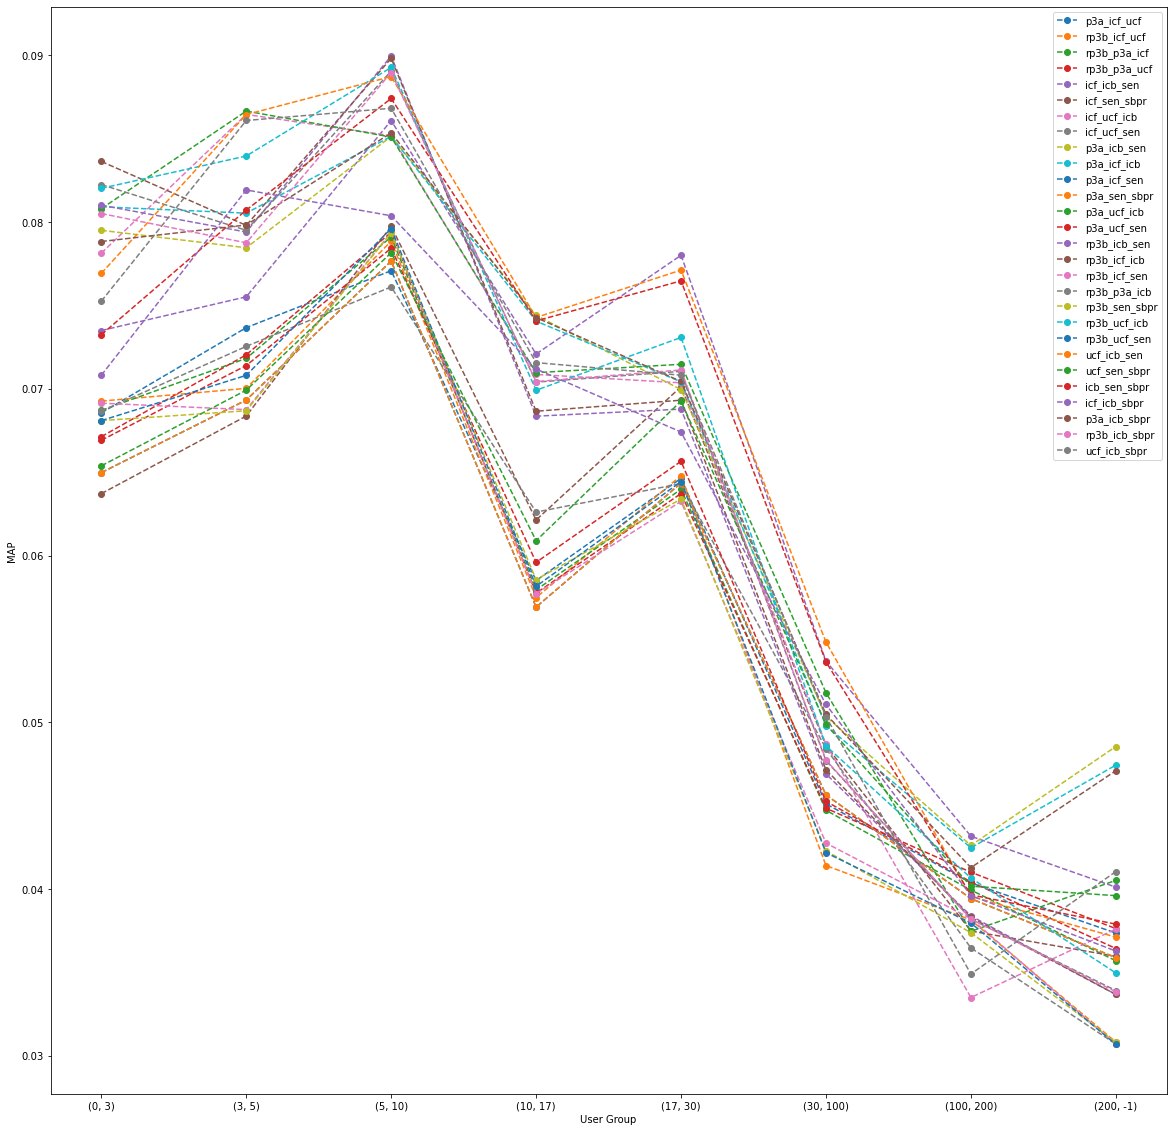

In [48]:
import matplotlib.pyplot as pyplot
%matplotlib inline  
pyplot.figure(figsize=(20,20))
pyplot.plot(MAP_combo1_per_group, '--o', label=labels["combo1"])
pyplot.plot(MAP_combo2_per_group, '--o', label=labels["combo2"])
pyplot.plot(MAP_combo3_per_group, '--o', label=labels["combo3"])
pyplot.plot(MAP_combo4_per_group, '--o', label=labels["combo4"])
pyplot.plot(MAP_combo5_per_group, '--o', label=labels["combo5"])
pyplot.plot(MAP_combo6_per_group, '--o', label=labels["combo6"])
pyplot.plot(MAP_combo7_per_group, '--o', label=labels["combo7"])
pyplot.plot(MAP_combo8_per_group, '--o', label=labels["combo8"])
pyplot.plot(MAP_combo9_per_group, '--o', label=labels["combo9"])
pyplot.plot(MAP_combo10_per_group, '--o', label=labels["combo10"])
pyplot.plot(MAP_combo11_per_group, '--o', label=labels["combo11"])
pyplot.plot(MAP_combo12_per_group, '--o', label=labels["combo12"])
pyplot.plot(MAP_combo13_per_group, '--o', label=labels["combo13"])
pyplot.plot(MAP_combo14_per_group, '--o', label=labels["combo14"])
pyplot.plot(MAP_combo15_per_group, '--o', label=labels["combo15"])
pyplot.plot(MAP_combo16_per_group, '--o', label=labels["combo16"])
pyplot.plot(MAP_combo17_per_group, '--o', label=labels["combo17"])
pyplot.plot(MAP_combo18_per_group, '--o', label=labels["combo18"])
pyplot.plot(MAP_combo19_per_group, '--o', label=labels["combo19"])
pyplot.plot(MAP_combo20_per_group, '--o', label=labels["combo20"])
pyplot.plot(MAP_combo21_per_group, '--o', label=labels["combo21"])
pyplot.plot(MAP_combo22_per_group, '--o', label=labels["combo22"])
pyplot.plot(MAP_combo23_per_group, '--o', label=labels["combo23"])
pyplot.plot(MAP_combo24_per_group, '--o', label=labels["combo24"])
pyplot.plot(MAP_combo25_per_group, '--o', label=labels["combo25"])
pyplot.plot(MAP_combo26_per_group, '--o', label=labels["combo26"])
pyplot.plot(MAP_combo27_per_group, '--o', label=labels["combo27"])
pyplot.plot(MAP_combo28_per_group, '--o', label=labels["combo28"])
pyplot.xticks(ticks=range(0,len(f_ranges)), labels=f_ranges)
pyplot.ylabel('MAP')
pyplot.xlabel('User Group')
pyplot.legend()
pyplot.show()

## ---------------------------------------------------------------------------------------------------------------------------------

In [35]:
f_ranges = [
    (0,2),
    (2,4),
    (4,6),
    (6,13),
    (13,-1)
]
MAP_combo1_per_group = []
MAP_combo2_per_group = []
MAP_combo3_per_group = []
MAP_combo4_per_group = []
MAP_combo5_per_group = []
MAP_combo6_per_group = []
MAP_combo7_per_group = []
MAP_combo8_per_group = []
MAP_combo9_per_group = []
MAP_combo10_per_group = []
MAP_combo11_per_group = []
MAP_combo12_per_group = []
MAP_combo13_per_group = []
MAP_combo14_per_group = []
MAP_combo15_per_group = []
MAP_combo16_per_group = []
MAP_combo17_per_group = []
MAP_combo18_per_group = []
MAP_combo19_per_group = []
MAP_combo20_per_group = []
MAP_combo21_per_group = []
MAP_combo22_per_group = []
MAP_combo23_per_group = []
MAP_combo24_per_group = []
MAP_combo25_per_group = []
MAP_combo26_per_group = []
MAP_combo27_per_group = []
MAP_combo28_per_group = []

cutoff = 10

for f_range in f_ranges:
    URM_test_group = parser.filter_URM_test_by_range(URM_train, URM_test, f_range)
    evaluator_test = EvaluatorHoldout(URM_test_group, cutoff_list=[cutoff])
    results, _ = evaluator_test.evaluateRecommender(combo1)
    MAP_combo1_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo2)
    MAP_combo2_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo3)
    MAP_combo3_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo4)
    MAP_combo4_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo5)
    MAP_combo5_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo6)
    MAP_combo6_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo7)
    MAP_combo7_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo8)
    MAP_combo8_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo9)
    MAP_combo9_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo10)
    MAP_combo10_per_group.append(results[cutoff]["MAP"])  
    
    results, _ = evaluator_test.evaluateRecommender(combo11)
    MAP_combo11_per_group.append(results[cutoff]["MAP"]) 
    
    results, _ = evaluator_test.evaluateRecommender(combo12)
    MAP_combo12_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo13)
    MAP_combo13_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo14)
    MAP_combo14_per_group.append(results[cutoff]["MAP"])  
    
    results, _ = evaluator_test.evaluateRecommender(combo15)
    MAP_combo15_per_group.append(results[cutoff]["MAP"]) 
    
    results, _ = evaluator_test.evaluateRecommender(combo16)
    MAP_combo16_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo17)
    MAP_combo17_per_group.append(results[cutoff]["MAP"])  
    
    results, _ = evaluator_test.evaluateRecommender(combo18)
    MAP_combo18_per_group.append(results[cutoff]["MAP"])

    results, _ = evaluator_test.evaluateRecommender(combo19)
    MAP_combo19_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo20)
    MAP_combo20_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo21)
    MAP_combo21_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo22)
    MAP_combo22_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo23)
    MAP_combo23_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo24)
    MAP_combo24_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo25)
    MAP_combo25_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo26)
    MAP_combo26_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo27)
    MAP_combo27_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo28)
    MAP_combo28_per_group.append(results[cutoff]["MAP"])

EvaluatorHoldout: Processed 232 ( 100.00% ) in 0.37 sec. Users per second: 621
EvaluatorHoldout: Processed 232 ( 100.00% ) in 0.31 sec. Users per second: 742
EvaluatorHoldout: Processed 232 ( 100.00% ) in 0.33 sec. Users per second: 712
EvaluatorHoldout: Processed 232 ( 100.00% ) in 0.33 sec. Users per second: 713
EvaluatorHoldout: Processed 232 ( 100.00% ) in 0.34 sec. Users per second: 682
EvaluatorHoldout: Processed 232 ( 100.00% ) in 0.32 sec. Users per second: 717
EvaluatorHoldout: Processed 232 ( 100.00% ) in 0.32 sec. Users per second: 733
EvaluatorHoldout: Processed 232 ( 100.00% ) in 0.33 sec. Users per second: 704
EvaluatorHoldout: Processed 232 ( 100.00% ) in 0.31 sec. Users per second: 750
EvaluatorHoldout: Processed 232 ( 100.00% ) in 0.31 sec. Users per second: 739
EvaluatorHoldout: Processed 232 ( 100.00% ) in 0.32 sec. Users per second: 723
EvaluatorHoldout: Processed 232 ( 100.00% ) in 0.31 sec. Users per second: 745
EvaluatorHoldout: Processed 232 ( 100.00% ) in 0.31 

EvaluatorHoldout: Processed 1124 ( 100.00% ) in 1.73 sec. Users per second: 650
EvaluatorHoldout: Processed 1124 ( 100.00% ) in 1.73 sec. Users per second: 649
EvaluatorHoldout: Processed 1124 ( 100.00% ) in 1.68 sec. Users per second: 669
EvaluatorHoldout: Processed 1124 ( 100.00% ) in 1.84 sec. Users per second: 609
EvaluatorHoldout: Processed 1124 ( 100.00% ) in 1.74 sec. Users per second: 646
EvaluatorHoldout: Processed 1124 ( 100.00% ) in 1.81 sec. Users per second: 622
EvaluatorHoldout: Processed 1124 ( 100.00% ) in 1.87 sec. Users per second: 601
EvaluatorHoldout: Processed 1124 ( 100.00% ) in 1.90 sec. Users per second: 593
EvaluatorHoldout: Processed 1124 ( 100.00% ) in 1.87 sec. Users per second: 600
EvaluatorHoldout: Processed 1124 ( 100.00% ) in 1.77 sec. Users per second: 635
EvaluatorHoldout: Processed 1124 ( 100.00% ) in 1.73 sec. Users per second: 648
EvaluatorHoldout: Processed 1124 ( 100.00% ) in 1.86 sec. Users per second: 604
EvaluatorHoldout: Processed 1124 ( 100.0

In [36]:
MAP_combo_list = [MAP_combo1_per_group,
                  MAP_combo2_per_group,
                  MAP_combo3_per_group,
                  MAP_combo4_per_group,
                  MAP_combo5_per_group,
                  MAP_combo6_per_group,
                  MAP_combo7_per_group,
                  MAP_combo8_per_group,
                  MAP_combo9_per_group,
                  MAP_combo10_per_group,
                  MAP_combo11_per_group,
                  MAP_combo12_per_group,
                  MAP_combo13_per_group,
                  MAP_combo14_per_group,
                  MAP_combo15_per_group,
                  MAP_combo16_per_group,
                  MAP_combo17_per_group,
                  MAP_combo18_per_group,
                  MAP_combo19_per_group,
                  MAP_combo20_per_group,
                  MAP_combo21_per_group,
                  MAP_combo22_per_group,
                  MAP_combo23_per_group,
                  MAP_combo24_per_group,
                  MAP_combo25_per_group,
                  MAP_combo26_per_group,
                  MAP_combo27_per_group,
                  MAP_combo28_per_group]

In [37]:
for i in range(0, len (f_ranges)):
    print(f"RANGE {f_ranges[i]}")
    maxp = 0
    maxc = ''
    combo_difference = ''
    max_difference = 0
    for n, MAP_combo in enumerate(MAP_combo_list):
        combo_name = 'combo' + str(n+1)
        print(f"> MAP {labels[combo_name]}:\t {MAP_combo[i]}")
        if MAP_combo[i] > maxp:
            max_difference = MAP_combo[i] - maxp
            combo_difference = maxc
            maxp = MAP_combo[i]
            maxc = labels[combo_name]
    print(f"Max MAP is {maxp} from {maxc} with difference from previous max of {max_difference} from {combo_difference}\n")

RANGE (0, 2)
> MAP p3a_icf_ucf:	 0.06341509304871372
> MAP rp3b_icf_ucf:	 0.06125478927203063
> MAP rp3b_p3a_icf:	 0.061147030651340986
> MAP rp3b_p3a_ucf:	 0.05815886699507388
> MAP icf_icb_sen:	 0.06451320470717023
> MAP icf_sen_sbpr:	 0.05706417624521072
> MAP icf_ucf_icb:	 0.07139607279693487
> MAP icf_ucf_sen:	 0.058740421455938684
> MAP p3a_icb_sen:	 0.06436097427476738
> MAP p3a_icf_icb:	 0.06795977011494253
> MAP p3a_icf_sen:	 0.05524938423645319
> MAP p3a_sen_sbpr:	 0.05524938423645319
> MAP p3a_ucf_icb:	 0.07707820197044336
> MAP p3a_ucf_sen:	 0.05791427203065133
> MAP rp3b_icb_sen:	 0.06819239189928844
> MAP rp3b_icf_icb:	 0.07248563218390805
> MAP rp3b_icf_sen:	 0.05866858237547891
> MAP rp3b_p3a_icb:	 0.06818726053639847
> MAP rp3b_sen_sbpr:	 0.058500957854406115
> MAP rp3b_ucf_icb:	 0.0726720717022441
> MAP rp3b_ucf_sen:	 0.05812978927203064
> MAP ucf_icb_sen:	 0.06739360974274766
> MAP ucf_sen_sbpr:	 0.05817768199233715
> MAP icb_sen_sbpr:	 0.0649681855500821
> MAP icf_i

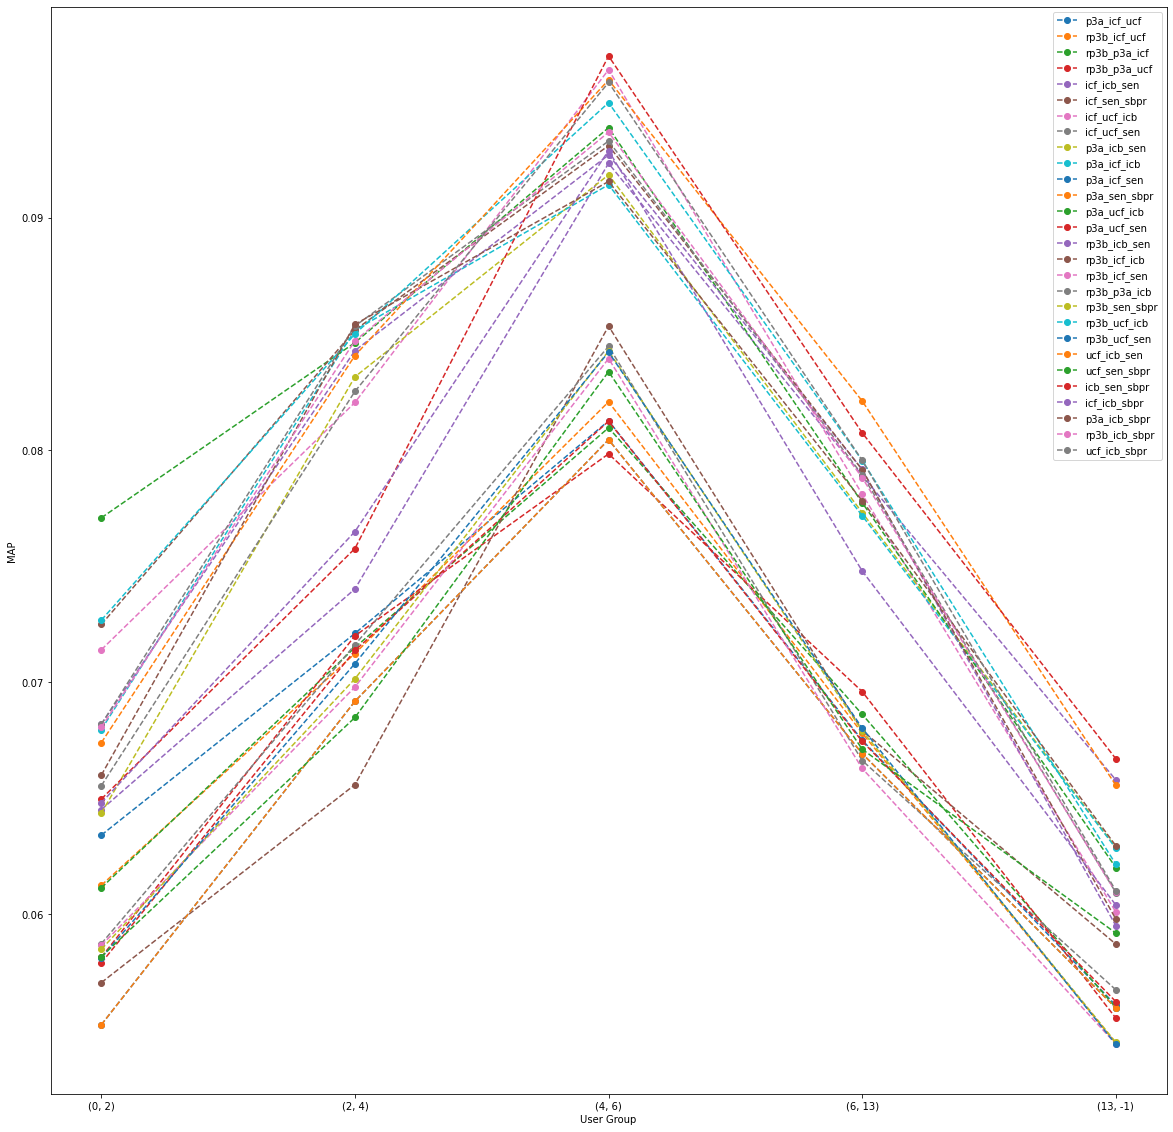

In [38]:
import matplotlib.pyplot as pyplot
%matplotlib inline  
pyplot.figure(figsize=(20,20))
pyplot.plot(MAP_combo1_per_group, '--o', label=labels["combo1"])
pyplot.plot(MAP_combo2_per_group, '--o', label=labels["combo2"])
pyplot.plot(MAP_combo3_per_group, '--o', label=labels["combo3"])
pyplot.plot(MAP_combo4_per_group, '--o', label=labels["combo4"])
pyplot.plot(MAP_combo5_per_group, '--o', label=labels["combo5"])
pyplot.plot(MAP_combo6_per_group, '--o', label=labels["combo6"])
pyplot.plot(MAP_combo7_per_group, '--o', label=labels["combo7"])
pyplot.plot(MAP_combo8_per_group, '--o', label=labels["combo8"])
pyplot.plot(MAP_combo9_per_group, '--o', label=labels["combo9"])
pyplot.plot(MAP_combo10_per_group, '--o', label=labels["combo10"])
pyplot.plot(MAP_combo11_per_group, '--o', label=labels["combo11"])
pyplot.plot(MAP_combo12_per_group, '--o', label=labels["combo12"])
pyplot.plot(MAP_combo13_per_group, '--o', label=labels["combo13"])
pyplot.plot(MAP_combo14_per_group, '--o', label=labels["combo14"])
pyplot.plot(MAP_combo15_per_group, '--o', label=labels["combo15"])
pyplot.plot(MAP_combo16_per_group, '--o', label=labels["combo16"])
pyplot.plot(MAP_combo17_per_group, '--o', label=labels["combo17"])
pyplot.plot(MAP_combo18_per_group, '--o', label=labels["combo18"])
pyplot.plot(MAP_combo19_per_group, '--o', label=labels["combo19"])
pyplot.plot(MAP_combo20_per_group, '--o', label=labels["combo20"])
pyplot.plot(MAP_combo21_per_group, '--o', label=labels["combo21"])
pyplot.plot(MAP_combo22_per_group, '--o', label=labels["combo22"])
pyplot.plot(MAP_combo23_per_group, '--o', label=labels["combo23"])
pyplot.plot(MAP_combo24_per_group, '--o', label=labels["combo24"])
pyplot.plot(MAP_combo25_per_group, '--o', label=labels["combo25"])
pyplot.plot(MAP_combo26_per_group, '--o', label=labels["combo26"])
pyplot.plot(MAP_combo27_per_group, '--o', label=labels["combo27"])
pyplot.plot(MAP_combo28_per_group, '--o', label=labels["combo28"])
pyplot.xticks(ticks=range(0,len(f_ranges)), labels=f_ranges)
pyplot.ylabel('MAP')
pyplot.xlabel('User Group')
pyplot.legend()
pyplot.show()

## 5 Range---------------------------------------------------------------------------------------------------------------------

In [67]:
f_ranges = [
    (0,4),
    (4,7),
    (7,13),
    (13,26),
    (26,-1)
]
MAP_combo1_per_group = []
MAP_combo2_per_group = []
MAP_combo3_per_group = []
MAP_combo4_per_group = []
MAP_combo5_per_group = []
MAP_combo6_per_group = []
MAP_combo7_per_group = []
MAP_combo8_per_group = []
MAP_combo9_per_group = []
MAP_combo10_per_group = []
MAP_combo11_per_group = []
MAP_combo12_per_group = []
MAP_combo13_per_group = []
MAP_combo14_per_group = []
MAP_combo15_per_group = []
MAP_combo16_per_group = []
MAP_combo17_per_group = []
MAP_combo18_per_group = []
MAP_combo19_per_group = []
MAP_combo20_per_group = []
MAP_combo21_per_group = []
MAP_combo22_per_group = []
MAP_combo23_per_group = []
MAP_combo24_per_group = []
MAP_combo25_per_group = []
MAP_combo26_per_group = []
MAP_combo27_per_group = []
MAP_combo28_per_group = []

cutoff = 10

for f_range in f_ranges:
    URM_test_group = parser.filter_URM_test_by_range(URM_train, URM_test, f_range)
    evaluator_test = EvaluatorHoldout(URM_test_group, cutoff_list=[cutoff])
    results, _ = evaluator_test.evaluateRecommender(combo1)
    MAP_combo1_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo2)
    MAP_combo2_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo3)
    MAP_combo3_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo4)
    MAP_combo4_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo5)
    MAP_combo5_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo6)
    MAP_combo6_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo7)
    MAP_combo7_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo8)
    MAP_combo8_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo9)
    MAP_combo9_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo10)
    MAP_combo10_per_group.append(results[cutoff]["MAP"])  
    
    results, _ = evaluator_test.evaluateRecommender(combo11)
    MAP_combo11_per_group.append(results[cutoff]["MAP"]) 
    
    results, _ = evaluator_test.evaluateRecommender(combo12)
    MAP_combo12_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo13)
    MAP_combo13_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo14)
    MAP_combo14_per_group.append(results[cutoff]["MAP"])  
    
    results, _ = evaluator_test.evaluateRecommender(combo15)
    MAP_combo15_per_group.append(results[cutoff]["MAP"]) 
    
    results, _ = evaluator_test.evaluateRecommender(combo16)
    MAP_combo16_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo17)
    MAP_combo17_per_group.append(results[cutoff]["MAP"])  
    
    results, _ = evaluator_test.evaluateRecommender(combo18)
    MAP_combo18_per_group.append(results[cutoff]["MAP"])

    results, _ = evaluator_test.evaluateRecommender(combo19)
    MAP_combo19_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo20)
    MAP_combo20_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo21)
    MAP_combo21_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo22)
    MAP_combo22_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo23)
    MAP_combo23_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo24)
    MAP_combo24_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo25)
    MAP_combo25_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo26)
    MAP_combo26_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo27)
    MAP_combo27_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo28)
    MAP_combo28_per_group.append(results[cutoff]["MAP"])

EvaluatorHoldout: Processed 887 ( 100.00% ) in 1.25 sec. Users per second: 708
EvaluatorHoldout: Processed 887 ( 100.00% ) in 1.25 sec. Users per second: 712
EvaluatorHoldout: Processed 887 ( 100.00% ) in 1.23 sec. Users per second: 723
EvaluatorHoldout: Processed 887 ( 100.00% ) in 1.27 sec. Users per second: 698
EvaluatorHoldout: Processed 887 ( 100.00% ) in 1.31 sec. Users per second: 679
EvaluatorHoldout: Processed 887 ( 100.00% ) in 1.37 sec. Users per second: 646
EvaluatorHoldout: Processed 887 ( 100.00% ) in 1.49 sec. Users per second: 597
EvaluatorHoldout: Processed 887 ( 100.00% ) in 1.36 sec. Users per second: 653
EvaluatorHoldout: Processed 887 ( 100.00% ) in 1.21 sec. Users per second: 735
EvaluatorHoldout: Processed 887 ( 100.00% ) in 1.21 sec. Users per second: 732
EvaluatorHoldout: Processed 887 ( 100.00% ) in 1.28 sec. Users per second: 692
EvaluatorHoldout: Processed 887 ( 100.00% ) in 1.29 sec. Users per second: 688
EvaluatorHoldout: Processed 887 ( 100.00% ) in 1.32 

EvaluatorHoldout: Processed 787 ( 100.00% ) in 1.33 sec. Users per second: 594
EvaluatorHoldout: Processed 787 ( 100.00% ) in 1.45 sec. Users per second: 541
EvaluatorHoldout: Processed 787 ( 100.00% ) in 1.38 sec. Users per second: 571
EvaluatorHoldout: Processed 787 ( 100.00% ) in 1.58 sec. Users per second: 499
EvaluatorHoldout: Processed 787 ( 100.00% ) in 1.33 sec. Users per second: 594
EvaluatorHoldout: Processed 787 ( 100.00% ) in 1.40 sec. Users per second: 561
EvaluatorHoldout: Processed 787 ( 100.00% ) in 1.40 sec. Users per second: 561
EvaluatorHoldout: Processed 787 ( 100.00% ) in 1.54 sec. Users per second: 512
EvaluatorHoldout: Processed 787 ( 100.00% ) in 1.50 sec. Users per second: 524
EvaluatorHoldout: Processed 787 ( 100.00% ) in 1.46 sec. Users per second: 539
EvaluatorHoldout: Processed 787 ( 100.00% ) in 1.43 sec. Users per second: 551
EvaluatorHoldout: Processed 787 ( 100.00% ) in 1.54 sec. Users per second: 509
EvaluatorHoldout: Processed 787 ( 100.00% ) in 1.45 

In [68]:
MAP_combo_list = [MAP_combo1_per_group,
                  MAP_combo2_per_group,
                  MAP_combo3_per_group,
                  MAP_combo4_per_group,
                  MAP_combo5_per_group,
                  MAP_combo6_per_group,
                  MAP_combo7_per_group,
                  MAP_combo8_per_group,
                  MAP_combo9_per_group,
                  MAP_combo10_per_group,
                  MAP_combo11_per_group,
                  MAP_combo12_per_group,
                  MAP_combo13_per_group,
                  MAP_combo14_per_group,
                  MAP_combo15_per_group,
                  MAP_combo16_per_group,
                  MAP_combo17_per_group,
                  MAP_combo18_per_group,
                  MAP_combo19_per_group,
                  MAP_combo20_per_group,
                  MAP_combo21_per_group,
                  MAP_combo22_per_group,
                  MAP_combo23_per_group,
                  MAP_combo24_per_group,
                  MAP_combo25_per_group,
                  MAP_combo26_per_group,
                  MAP_combo27_per_group,
                  MAP_combo28_per_group]

In [69]:
for i in range(0, len (f_ranges)):
    print(f"RANGE {f_ranges[i]}")
    maxp = 0
    maxc = ''
    combo_difference = ''
    max_difference = 0
    for n, MAP_combo in enumerate(MAP_combo_list):
        combo_name = 'combo' + str(n+1)
        print(f"> MAP {labels[combo_name]}:\t {MAP_combo[i]}")
        if MAP_combo[i] > maxp:
            max_difference = MAP_combo[i] - maxp
            combo_difference = maxc
            maxp = MAP_combo[i]
            maxc = labels[combo_name]
    print(f"Max MAP is {maxp} from {maxc} with difference from previous max of {max_difference} from {combo_difference}\n")

RANGE (0, 4)
> MAP p3a_icf_ucf:	 0.06982956341750031
> MAP rp3b_icf_ucf:	 0.06862544215982773
> MAP rp3b_p3a_icf:	 0.06878858646051433
> MAP rp3b_p3a_ucf:	 0.06837737036440535
> MAP icf_icb_sen:	 0.07153057389810497
> MAP icf_sen_sbpr:	 0.06335956467016222
> MAP icf_ucf_icb:	 0.07926016893040572
> MAP icf_ucf_sen:	 0.06824658649630465
> MAP p3a_icb_sen:	 0.07823499937366908
> MAP p3a_icf_icb:	 0.08065979492135075
> MAP p3a_icf_sen:	 0.06553434977899467
> MAP p3a_sen_sbpr:	 0.06553434977899467
> MAP p3a_ucf_icb:	 0.08264921589329711
> MAP p3a_ucf_sen:	 0.06784901546739205
> MAP rp3b_icb_sen:	 0.08007014906676696
> MAP rp3b_icf_icb:	 0.08184758683631294
> MAP rp3b_icf_sen:	 0.06688319822479918
> MAP rp3b_p3a_icb:	 0.08084948372434285
> MAP rp3b_sen_sbpr:	 0.0671012210471061
> MAP rp3b_ucf_icb:	 0.08177242712191984
> MAP rp3b_ucf_sen:	 0.0674885023532149
> MAP ucf_icb_sen:	 0.07970464021760532
> MAP ucf_sen_sbpr:	 0.06578637342447943
> MAP icb_sen_sbpr:	 0.0729346736815734
> MAP icf_icb_s

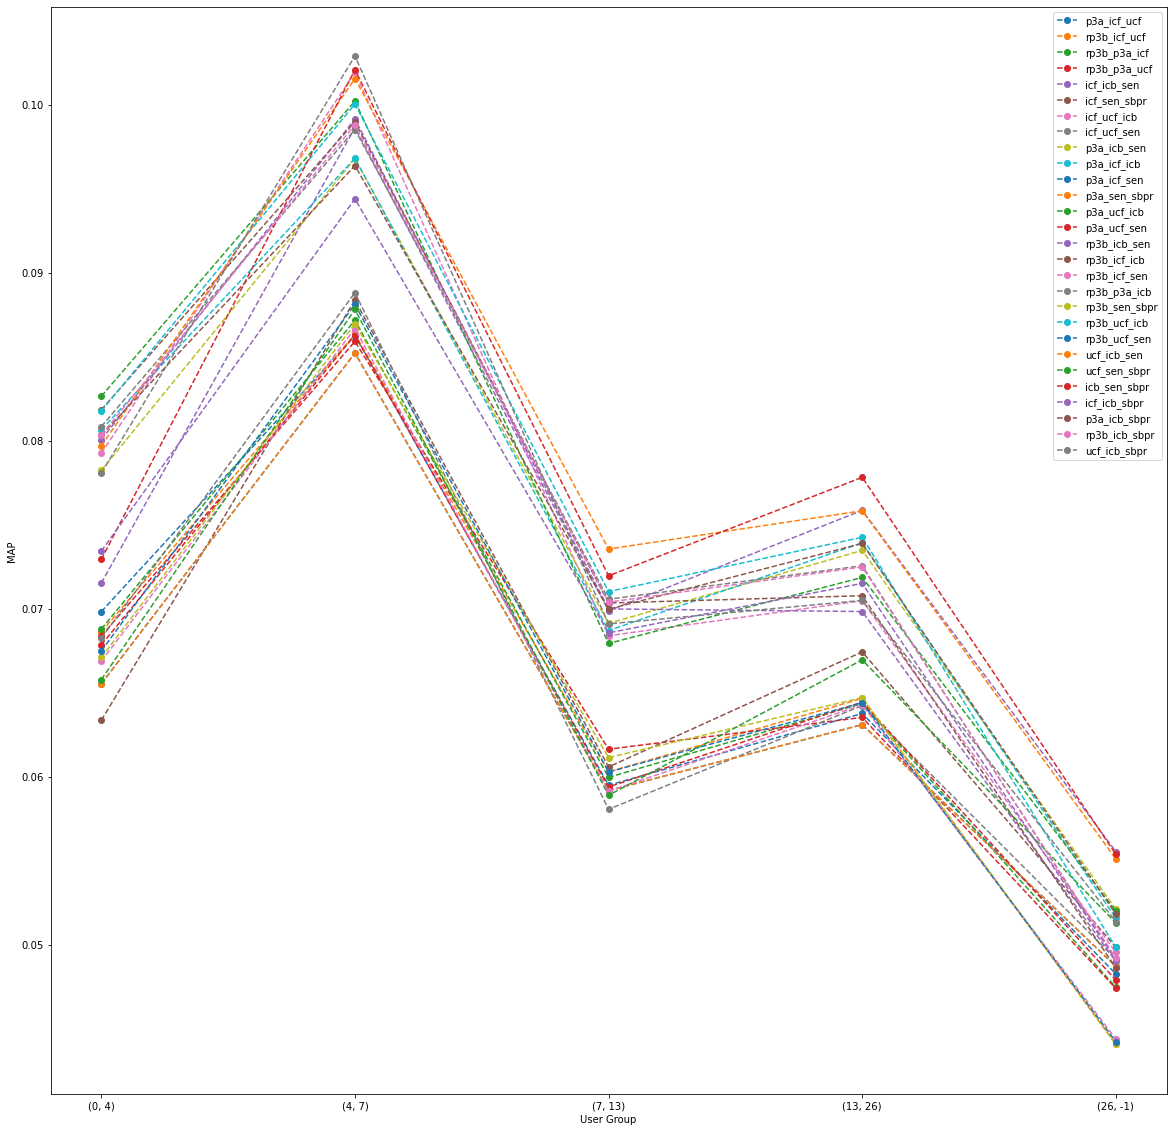

In [70]:
import matplotlib.pyplot as pyplot
%matplotlib inline  
pyplot.figure(figsize=(20,20))
pyplot.plot(MAP_combo1_per_group, '--o', label=labels["combo1"])
pyplot.plot(MAP_combo2_per_group, '--o', label=labels["combo2"])
pyplot.plot(MAP_combo3_per_group, '--o', label=labels["combo3"])
pyplot.plot(MAP_combo4_per_group, '--o', label=labels["combo4"])
pyplot.plot(MAP_combo5_per_group, '--o', label=labels["combo5"])
pyplot.plot(MAP_combo6_per_group, '--o', label=labels["combo6"])
pyplot.plot(MAP_combo7_per_group, '--o', label=labels["combo7"])
pyplot.plot(MAP_combo8_per_group, '--o', label=labels["combo8"])
pyplot.plot(MAP_combo9_per_group, '--o', label=labels["combo9"])
pyplot.plot(MAP_combo10_per_group, '--o', label=labels["combo10"])
pyplot.plot(MAP_combo11_per_group, '--o', label=labels["combo11"])
pyplot.plot(MAP_combo12_per_group, '--o', label=labels["combo12"])
pyplot.plot(MAP_combo13_per_group, '--o', label=labels["combo13"])
pyplot.plot(MAP_combo14_per_group, '--o', label=labels["combo14"])
pyplot.plot(MAP_combo15_per_group, '--o', label=labels["combo15"])
pyplot.plot(MAP_combo16_per_group, '--o', label=labels["combo16"])
pyplot.plot(MAP_combo17_per_group, '--o', label=labels["combo17"])
pyplot.plot(MAP_combo18_per_group, '--o', label=labels["combo18"])
pyplot.plot(MAP_combo19_per_group, '--o', label=labels["combo19"])
pyplot.plot(MAP_combo20_per_group, '--o', label=labels["combo20"])
pyplot.plot(MAP_combo21_per_group, '--o', label=labels["combo21"])
pyplot.plot(MAP_combo22_per_group, '--o', label=labels["combo22"])
pyplot.plot(MAP_combo23_per_group, '--o', label=labels["combo23"])
pyplot.plot(MAP_combo24_per_group, '--o', label=labels["combo24"])
pyplot.plot(MAP_combo25_per_group, '--o', label=labels["combo25"])
pyplot.plot(MAP_combo26_per_group, '--o', label=labels["combo26"])
pyplot.plot(MAP_combo27_per_group, '--o', label=labels["combo27"])
pyplot.plot(MAP_combo28_per_group, '--o', label=labels["combo28"])
pyplot.xticks(ticks=range(0,len(f_ranges)), labels=f_ranges)
pyplot.ylabel('MAP')
pyplot.xlabel('User Group')
pyplot.legend()
pyplot.show()

## 4 Range -------------------------------------------------------------------------------------------------------------------

In [74]:
f_ranges = [
    (0,5),
    (5,10),
    (10,22),
    (22,-1)
]
MAP_combo1_per_group = []
MAP_combo2_per_group = []
MAP_combo3_per_group = []
MAP_combo4_per_group = []
MAP_combo5_per_group = []
MAP_combo6_per_group = []
MAP_combo7_per_group = []
MAP_combo8_per_group = []
MAP_combo9_per_group = []
MAP_combo10_per_group = []
MAP_combo11_per_group = []
MAP_combo12_per_group = []
MAP_combo13_per_group = []
MAP_combo14_per_group = []
MAP_combo15_per_group = []
MAP_combo16_per_group = []
MAP_combo17_per_group = []
MAP_combo18_per_group = []
MAP_combo19_per_group = []
MAP_combo20_per_group = []
MAP_combo21_per_group = []
MAP_combo22_per_group = []
MAP_combo23_per_group = []
MAP_combo24_per_group = []
MAP_combo25_per_group = []
MAP_combo26_per_group = []
MAP_combo27_per_group = []
MAP_combo28_per_group = []

cutoff = 10

for f_range in f_ranges:
    URM_test_group = parser.filter_URM_test_by_range(URM_train, URM_test, f_range)
    evaluator_test = EvaluatorHoldout(URM_test_group, cutoff_list=[cutoff])
    results, _ = evaluator_test.evaluateRecommender(combo1)
    MAP_combo1_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo2)
    MAP_combo2_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo3)
    MAP_combo3_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo4)
    MAP_combo4_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo5)
    MAP_combo5_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo6)
    MAP_combo6_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo7)
    MAP_combo7_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo8)
    MAP_combo8_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo9)
    MAP_combo9_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo10)
    MAP_combo10_per_group.append(results[cutoff]["MAP"])  
    
    results, _ = evaluator_test.evaluateRecommender(combo11)
    MAP_combo11_per_group.append(results[cutoff]["MAP"]) 
    
    results, _ = evaluator_test.evaluateRecommender(combo12)
    MAP_combo12_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo13)
    MAP_combo13_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo14)
    MAP_combo14_per_group.append(results[cutoff]["MAP"])  
    
    results, _ = evaluator_test.evaluateRecommender(combo15)
    MAP_combo15_per_group.append(results[cutoff]["MAP"]) 
    
    results, _ = evaluator_test.evaluateRecommender(combo16)
    MAP_combo16_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo17)
    MAP_combo17_per_group.append(results[cutoff]["MAP"])  
    
    results, _ = evaluator_test.evaluateRecommender(combo18)
    MAP_combo18_per_group.append(results[cutoff]["MAP"])

    results, _ = evaluator_test.evaluateRecommender(combo19)
    MAP_combo19_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo20)
    MAP_combo20_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo21)
    MAP_combo21_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo22)
    MAP_combo22_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo23)
    MAP_combo23_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo24)
    MAP_combo24_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo25)
    MAP_combo25_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo26)
    MAP_combo26_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo27)
    MAP_combo27_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo28)
    MAP_combo28_per_group.append(results[cutoff]["MAP"])

EvaluatorHoldout: Processed 1147 ( 100.00% ) in 1.80 sec. Users per second: 638
EvaluatorHoldout: Processed 1147 ( 100.00% ) in 1.74 sec. Users per second: 660
EvaluatorHoldout: Processed 1147 ( 100.00% ) in 1.76 sec. Users per second: 653
EvaluatorHoldout: Processed 1147 ( 100.00% ) in 1.80 sec. Users per second: 639
EvaluatorHoldout: Processed 1147 ( 100.00% ) in 1.85 sec. Users per second: 620
EvaluatorHoldout: Processed 1147 ( 100.00% ) in 1.89 sec. Users per second: 608
EvaluatorHoldout: Processed 1147 ( 100.00% ) in 1.73 sec. Users per second: 663
EvaluatorHoldout: Processed 1147 ( 100.00% ) in 1.77 sec. Users per second: 647
EvaluatorHoldout: Processed 1147 ( 100.00% ) in 1.76 sec. Users per second: 650
EvaluatorHoldout: Processed 1147 ( 100.00% ) in 1.79 sec. Users per second: 642
EvaluatorHoldout: Processed 1147 ( 100.00% ) in 1.74 sec. Users per second: 658
EvaluatorHoldout: Processed 1147 ( 100.00% ) in 1.82 sec. Users per second: 629
EvaluatorHoldout: Processed 1147 ( 100.0

EvaluatorHoldout: Processed 945 ( 100.00% ) in 2.34 sec. Users per second: 403
EvaluatorHoldout: Processed 945 ( 100.00% ) in 2.12 sec. Users per second: 446
EvaluatorHoldout: Processed 945 ( 100.00% ) in 2.32 sec. Users per second: 407
EvaluatorHoldout: Processed 945 ( 100.00% ) in 2.09 sec. Users per second: 451
EvaluatorHoldout: Processed 945 ( 100.00% ) in 2.82 sec. Users per second: 336
EvaluatorHoldout: Processed 945 ( 100.00% ) in 2.12 sec. Users per second: 446
EvaluatorHoldout: Processed 945 ( 100.00% ) in 2.29 sec. Users per second: 413
EvaluatorHoldout: Processed 945 ( 100.00% ) in 2.05 sec. Users per second: 461
EvaluatorHoldout: Processed 945 ( 100.00% ) in 2.53 sec. Users per second: 373
EvaluatorHoldout: Processed 945 ( 100.00% ) in 2.49 sec. Users per second: 380
EvaluatorHoldout: Processed 945 ( 100.00% ) in 2.30 sec. Users per second: 410
EvaluatorHoldout: Processed 945 ( 100.00% ) in 2.26 sec. Users per second: 417
EvaluatorHoldout: Processed 945 ( 100.00% ) in 2.53 

In [75]:
MAP_combo_list = [MAP_combo1_per_group,
                  MAP_combo2_per_group,
                  MAP_combo3_per_group,
                  MAP_combo4_per_group,
                  MAP_combo5_per_group,
                  MAP_combo6_per_group,
                  MAP_combo7_per_group,
                  MAP_combo8_per_group,
                  MAP_combo9_per_group,
                  MAP_combo10_per_group,
                  MAP_combo11_per_group,
                  MAP_combo12_per_group,
                  MAP_combo13_per_group,
                  MAP_combo14_per_group,
                  MAP_combo15_per_group,
                  MAP_combo16_per_group,
                  MAP_combo17_per_group,
                  MAP_combo18_per_group,
                  MAP_combo19_per_group,
                  MAP_combo20_per_group,
                  MAP_combo21_per_group,
                  MAP_combo22_per_group,
                  MAP_combo23_per_group,
                  MAP_combo24_per_group,
                  MAP_combo25_per_group,
                  MAP_combo26_per_group,
                  MAP_combo27_per_group,
                  MAP_combo28_per_group]

In [76]:
for i in range(0, len (f_ranges)):
    print(f"RANGE {f_ranges[i]}")
    maxp = 0
    maxc = ''
    combo_difference = ''
    max_difference = 0
    for n, MAP_combo in enumerate(MAP_combo_list):
        combo_name = 'combo' + str(n+1)
        print(f"> MAP {labels[combo_name]}:\t {MAP_combo[i]}")
        if MAP_combo[i] > maxp:
            max_difference = MAP_combo[i] - maxp
            combo_difference = maxc
            maxp = MAP_combo[i]
            maxc = labels[combo_name]
    print(f"Max MAP is {maxp} from {maxc} with difference from previous max of {max_difference} from {combo_difference}\n")

RANGE (0, 5)
> MAP p3a_icf_ucf:	 0.07114724171175789
> MAP rp3b_icf_ucf:	 0.06965121803831485
> MAP rp3b_p3a_icf:	 0.07028929851510497
> MAP rp3b_p3a_ucf:	 0.06961702485896037
> MAP icf_icb_sen:	 0.0745092442673088
> MAP icf_sen_sbpr:	 0.0658975219459091
> MAP icf_ucf_icb:	 0.08235268678817069
> MAP icf_ucf_sen:	 0.07047283458573785
> MAP p3a_icb_sen:	 0.07905094034126292
> MAP p3a_icf_icb:	 0.08072531056402027
> MAP p3a_icf_sen:	 0.0671790454048519
> MAP p3a_sen_sbpr:	 0.0671790454048519
> MAP p3a_ucf_icb:	 0.08377092530318338
> MAP p3a_ucf_sen:	 0.06901296457748075
> MAP rp3b_icb_sen:	 0.08019817052075123
> MAP rp3b_icf_icb:	 0.08169621234137367
> MAP rp3b_icf_sen:	 0.06866982189562838
> MAP rp3b_p3a_icb:	 0.08086242924952605
> MAP rp3b_sen_sbpr:	 0.06887267451783585
> MAP rp3b_ucf_icb:	 0.08300777736261607
> MAP rp3b_ucf_sen:	 0.06928322331548141
> MAP ucf_icb_sen:	 0.08172388978840597
> MAP ucf_sen_sbpr:	 0.06739885046336665
> MAP icb_sen_sbpr:	 0.0766490568909924
> MAP icf_icb_sbp

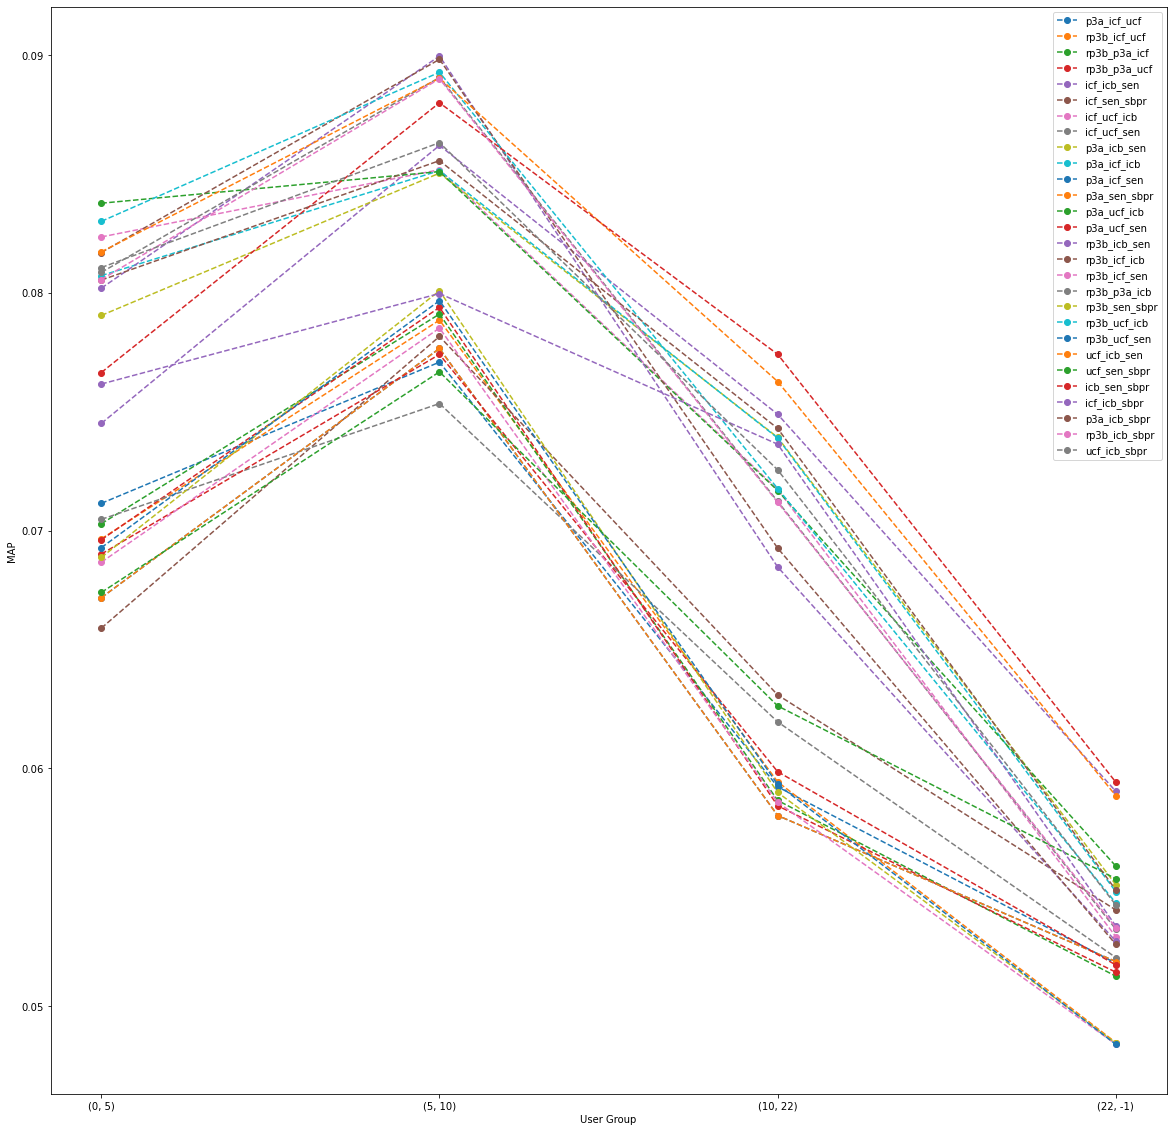

In [77]:
import matplotlib.pyplot as pyplot
%matplotlib inline  
pyplot.figure(figsize=(20,20))
pyplot.plot(MAP_combo1_per_group, '--o', label=labels["combo1"])
pyplot.plot(MAP_combo2_per_group, '--o', label=labels["combo2"])
pyplot.plot(MAP_combo3_per_group, '--o', label=labels["combo3"])
pyplot.plot(MAP_combo4_per_group, '--o', label=labels["combo4"])
pyplot.plot(MAP_combo5_per_group, '--o', label=labels["combo5"])
pyplot.plot(MAP_combo6_per_group, '--o', label=labels["combo6"])
pyplot.plot(MAP_combo7_per_group, '--o', label=labels["combo7"])
pyplot.plot(MAP_combo8_per_group, '--o', label=labels["combo8"])
pyplot.plot(MAP_combo9_per_group, '--o', label=labels["combo9"])
pyplot.plot(MAP_combo10_per_group, '--o', label=labels["combo10"])
pyplot.plot(MAP_combo11_per_group, '--o', label=labels["combo11"])
pyplot.plot(MAP_combo12_per_group, '--o', label=labels["combo12"])
pyplot.plot(MAP_combo13_per_group, '--o', label=labels["combo13"])
pyplot.plot(MAP_combo14_per_group, '--o', label=labels["combo14"])
pyplot.plot(MAP_combo15_per_group, '--o', label=labels["combo15"])
pyplot.plot(MAP_combo16_per_group, '--o', label=labels["combo16"])
pyplot.plot(MAP_combo17_per_group, '--o', label=labels["combo17"])
pyplot.plot(MAP_combo18_per_group, '--o', label=labels["combo18"])
pyplot.plot(MAP_combo19_per_group, '--o', label=labels["combo19"])
pyplot.plot(MAP_combo20_per_group, '--o', label=labels["combo20"])
pyplot.plot(MAP_combo21_per_group, '--o', label=labels["combo21"])
pyplot.plot(MAP_combo22_per_group, '--o', label=labels["combo22"])
pyplot.plot(MAP_combo23_per_group, '--o', label=labels["combo23"])
pyplot.plot(MAP_combo24_per_group, '--o', label=labels["combo24"])
pyplot.plot(MAP_combo25_per_group, '--o', label=labels["combo25"])
pyplot.plot(MAP_combo26_per_group, '--o', label=labels["combo26"])
pyplot.plot(MAP_combo27_per_group, '--o', label=labels["combo27"])
pyplot.plot(MAP_combo28_per_group, '--o', label=labels["combo28"])
pyplot.xticks(ticks=range(0,len(f_ranges)), labels=f_ranges)
pyplot.ylabel('MAP')
pyplot.xlabel('User Group')
pyplot.legend()
pyplot.show()

## 3 Range ---------------------------------------------------------------------------------------------------------------------

In [82]:
f_ranges = [
    (0,6),
    (6,16),
    (16,-1)
]
MAP_combo1_per_group = []
MAP_combo2_per_group = []
MAP_combo3_per_group = []
MAP_combo4_per_group = []
MAP_combo5_per_group = []
MAP_combo6_per_group = []
MAP_combo7_per_group = []
MAP_combo8_per_group = []
MAP_combo9_per_group = []
MAP_combo10_per_group = []
MAP_combo11_per_group = []
MAP_combo12_per_group = []
MAP_combo13_per_group = []
MAP_combo14_per_group = []
MAP_combo15_per_group = []
MAP_combo16_per_group = []
MAP_combo17_per_group = []
MAP_combo18_per_group = []
MAP_combo19_per_group = []
MAP_combo20_per_group = []
MAP_combo21_per_group = []
MAP_combo22_per_group = []
MAP_combo23_per_group = []
MAP_combo24_per_group = []
MAP_combo25_per_group = []
MAP_combo26_per_group = []
MAP_combo27_per_group = []
MAP_combo28_per_group = []

cutoff = 10

for f_range in f_ranges:
    URM_test_group = parser.filter_URM_test_by_range(URM_train, URM_test, f_range)
    evaluator_test = EvaluatorHoldout(URM_test_group, cutoff_list=[cutoff])
    results, _ = evaluator_test.evaluateRecommender(combo1)
    MAP_combo1_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo2)
    MAP_combo2_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo3)
    MAP_combo3_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo4)
    MAP_combo4_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo5)
    MAP_combo5_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo6)
    MAP_combo6_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo7)
    MAP_combo7_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo8)
    MAP_combo8_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo9)
    MAP_combo9_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo10)
    MAP_combo10_per_group.append(results[cutoff]["MAP"])  
    
    results, _ = evaluator_test.evaluateRecommender(combo11)
    MAP_combo11_per_group.append(results[cutoff]["MAP"]) 
    
    results, _ = evaluator_test.evaluateRecommender(combo12)
    MAP_combo12_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo13)
    MAP_combo13_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo14)
    MAP_combo14_per_group.append(results[cutoff]["MAP"])  
    
    results, _ = evaluator_test.evaluateRecommender(combo15)
    MAP_combo15_per_group.append(results[cutoff]["MAP"]) 
    
    results, _ = evaluator_test.evaluateRecommender(combo16)
    MAP_combo16_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo17)
    MAP_combo17_per_group.append(results[cutoff]["MAP"])  
    
    results, _ = evaluator_test.evaluateRecommender(combo18)
    MAP_combo18_per_group.append(results[cutoff]["MAP"])

    results, _ = evaluator_test.evaluateRecommender(combo19)
    MAP_combo19_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo20)
    MAP_combo20_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo21)
    MAP_combo21_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo22)
    MAP_combo22_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo23)
    MAP_combo23_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo24)
    MAP_combo24_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo25)
    MAP_combo25_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo26)
    MAP_combo26_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo27)
    MAP_combo27_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo28)
    MAP_combo28_per_group.append(results[cutoff]["MAP"])

EvaluatorHoldout: Processed 1395 ( 100.00% ) in 2.14 sec. Users per second: 652
EvaluatorHoldout: Processed 1395 ( 100.00% ) in 2.15 sec. Users per second: 650
EvaluatorHoldout: Processed 1395 ( 100.00% ) in 2.09 sec. Users per second: 667
EvaluatorHoldout: Processed 1395 ( 100.00% ) in 2.15 sec. Users per second: 648
EvaluatorHoldout: Processed 1395 ( 100.00% ) in 2.16 sec. Users per second: 646
EvaluatorHoldout: Processed 1395 ( 100.00% ) in 2.21 sec. Users per second: 630
EvaluatorHoldout: Processed 1395 ( 100.00% ) in 2.14 sec. Users per second: 651
EvaluatorHoldout: Processed 1395 ( 100.00% ) in 2.20 sec. Users per second: 635
EvaluatorHoldout: Processed 1395 ( 100.00% ) in 2.08 sec. Users per second: 670
EvaluatorHoldout: Processed 1395 ( 100.00% ) in 2.05 sec. Users per second: 682
EvaluatorHoldout: Processed 1395 ( 100.00% ) in 2.06 sec. Users per second: 677
EvaluatorHoldout: Processed 1395 ( 100.00% ) in 2.13 sec. Users per second: 655
EvaluatorHoldout: Processed 1395 ( 100.0

In [83]:
MAP_combo_list = [MAP_combo1_per_group,
                  MAP_combo2_per_group,
                  MAP_combo3_per_group,
                  MAP_combo4_per_group,
                  MAP_combo5_per_group,
                  MAP_combo6_per_group,
                  MAP_combo7_per_group,
                  MAP_combo8_per_group,
                  MAP_combo9_per_group,
                  MAP_combo10_per_group,
                  MAP_combo11_per_group,
                  MAP_combo12_per_group,
                  MAP_combo13_per_group,
                  MAP_combo14_per_group,
                  MAP_combo15_per_group,
                  MAP_combo16_per_group,
                  MAP_combo17_per_group,
                  MAP_combo18_per_group,
                  MAP_combo19_per_group,
                  MAP_combo20_per_group,
                  MAP_combo21_per_group,
                  MAP_combo22_per_group,
                  MAP_combo23_per_group,
                  MAP_combo24_per_group,
                  MAP_combo25_per_group,
                  MAP_combo26_per_group,
                  MAP_combo27_per_group,
                  MAP_combo28_per_group]

In [84]:
for i in range(0, len (f_ranges)):
    print(f"RANGE {f_ranges[i]}")
    maxp = 0
    maxc = ''
    combo_difference = ''
    max_difference = 0
    for n, MAP_combo in enumerate(MAP_combo_list):
        combo_name = 'combo' + str(n+1)
        print(f"> MAP {labels[combo_name]}:\t {MAP_combo[i]}")
        if MAP_combo[i] > maxp:
            max_difference = MAP_combo[i] - maxp
            combo_difference = maxc
            maxp = MAP_combo[i]
            maxc = labels[combo_name]
    print(f"Max MAP is {maxp} from {maxc} with difference from previous max of {max_difference} from {combo_difference}\n")

RANGE (0, 6)
> MAP p3a_icf_ucf:	 0.0739896360774497
> MAP rp3b_icf_ucf:	 0.07352197948076086
> MAP rp3b_p3a_icf:	 0.07321969050463674
> MAP rp3b_p3a_ucf:	 0.07254873793404258
> MAP icf_icb_sen:	 0.0791089207487057
> MAP icf_sen_sbpr:	 0.07136153306404204
> MAP icf_ucf_icb:	 0.08549216779503514
> MAP icf_ucf_sen:	 0.07415244353416396
> MAP p3a_icb_sen:	 0.08319223985890649
> MAP p3a_icf_icb:	 0.08457823671085321
> MAP p3a_icf_sen:	 0.07096347499573308
> MAP p3a_sen_sbpr:	 0.07096347499573308
> MAP p3a_ucf_icb:	 0.08673844607536363
> MAP p3a_ucf_sen:	 0.07272463067265936
> MAP rp3b_icb_sen:	 0.08467040260947072
> MAP rp3b_icf_icb:	 0.08594768731865506
> MAP rp3b_icf_sen:	 0.0730926779313876
> MAP rp3b_p3a_icb:	 0.0853841193984563
> MAP rp3b_sen_sbpr:	 0.07335049591321995
> MAP rp3b_ucf_icb:	 0.0865726043503821
> MAP rp3b_ucf_sen:	 0.07357953575695511
> MAP ucf_icb_sen:	 0.0856146763763251
> MAP ucf_sen_sbpr:	 0.07219074168894958
> MAP icb_sen_sbpr:	 0.08168458781362005
> MAP icf_icb_sbpr

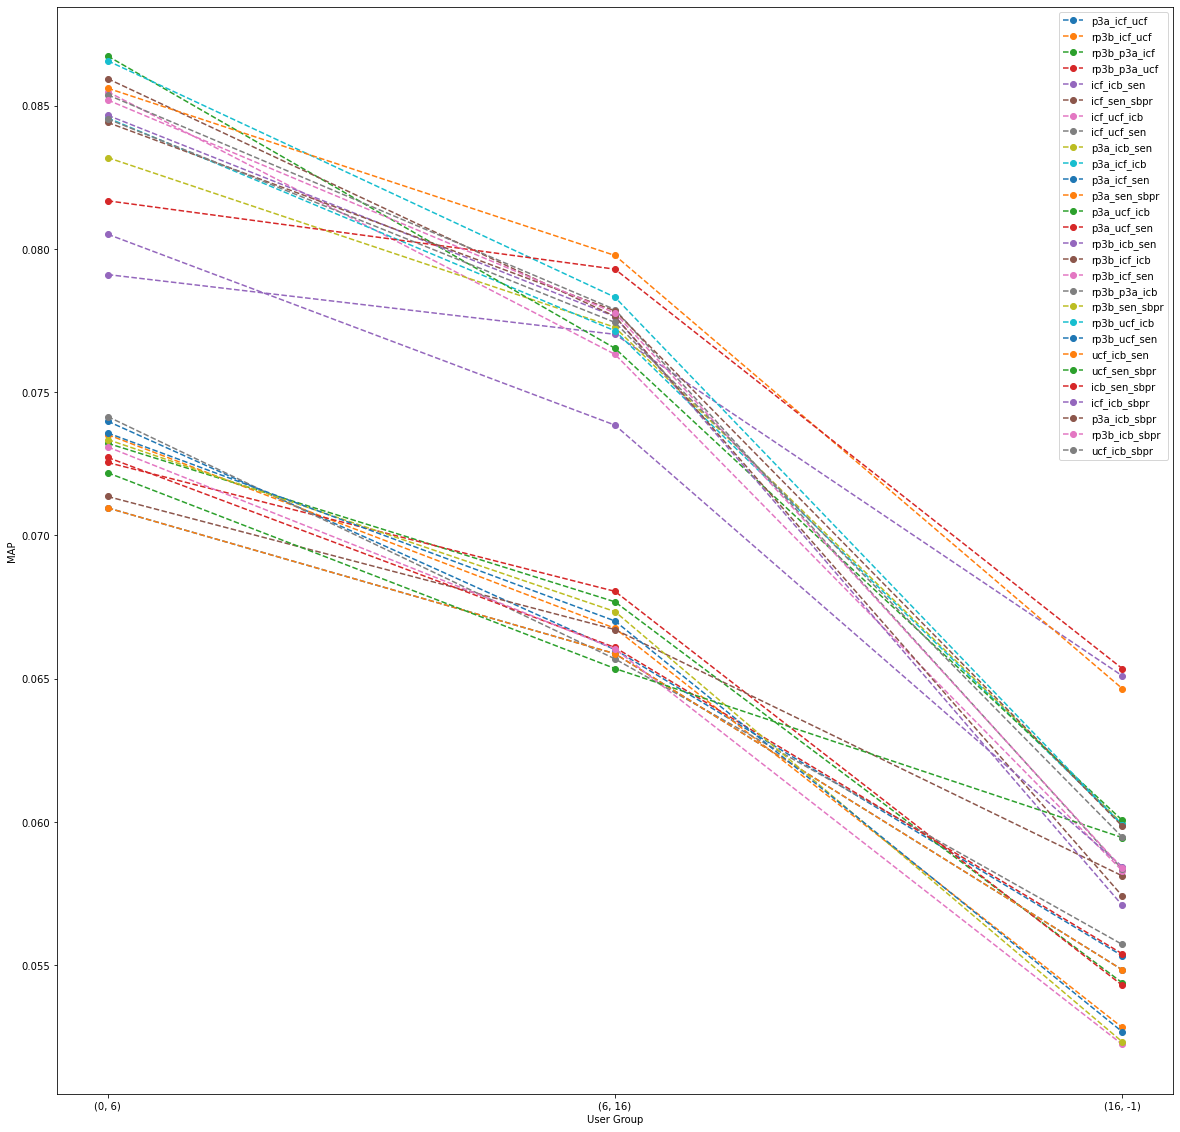

In [85]:
import matplotlib.pyplot as pyplot
%matplotlib inline  
pyplot.figure(figsize=(20,20))
pyplot.plot(MAP_combo1_per_group, '--o', label=labels["combo1"])
pyplot.plot(MAP_combo2_per_group, '--o', label=labels["combo2"])
pyplot.plot(MAP_combo3_per_group, '--o', label=labels["combo3"])
pyplot.plot(MAP_combo4_per_group, '--o', label=labels["combo4"])
pyplot.plot(MAP_combo5_per_group, '--o', label=labels["combo5"])
pyplot.plot(MAP_combo6_per_group, '--o', label=labels["combo6"])
pyplot.plot(MAP_combo7_per_group, '--o', label=labels["combo7"])
pyplot.plot(MAP_combo8_per_group, '--o', label=labels["combo8"])
pyplot.plot(MAP_combo9_per_group, '--o', label=labels["combo9"])
pyplot.plot(MAP_combo10_per_group, '--o', label=labels["combo10"])
pyplot.plot(MAP_combo11_per_group, '--o', label=labels["combo11"])
pyplot.plot(MAP_combo12_per_group, '--o', label=labels["combo12"])
pyplot.plot(MAP_combo13_per_group, '--o', label=labels["combo13"])
pyplot.plot(MAP_combo14_per_group, '--o', label=labels["combo14"])
pyplot.plot(MAP_combo15_per_group, '--o', label=labels["combo15"])
pyplot.plot(MAP_combo16_per_group, '--o', label=labels["combo16"])
pyplot.plot(MAP_combo17_per_group, '--o', label=labels["combo17"])
pyplot.plot(MAP_combo18_per_group, '--o', label=labels["combo18"])
pyplot.plot(MAP_combo19_per_group, '--o', label=labels["combo19"])
pyplot.plot(MAP_combo20_per_group, '--o', label=labels["combo20"])
pyplot.plot(MAP_combo21_per_group, '--o', label=labels["combo21"])
pyplot.plot(MAP_combo22_per_group, '--o', label=labels["combo22"])
pyplot.plot(MAP_combo23_per_group, '--o', label=labels["combo23"])
pyplot.plot(MAP_combo24_per_group, '--o', label=labels["combo24"])
pyplot.plot(MAP_combo25_per_group, '--o', label=labels["combo25"])
pyplot.plot(MAP_combo26_per_group, '--o', label=labels["combo26"])
pyplot.plot(MAP_combo27_per_group, '--o', label=labels["combo27"])
pyplot.plot(MAP_combo28_per_group, '--o', label=labels["combo28"])
pyplot.xticks(ticks=range(0,len(f_ranges)), labels=f_ranges)
pyplot.ylabel('MAP')
pyplot.xlabel('User Group')
pyplot.legend()
pyplot.show()

## 2 Range --------------------------------------------------------------------------------------------------------------------

In [86]:
f_ranges = [
    (0,9),
    (9,-1)
]
MAP_combo1_per_group = []
MAP_combo2_per_group = []
MAP_combo3_per_group = []
MAP_combo4_per_group = []
MAP_combo5_per_group = []
MAP_combo6_per_group = []
MAP_combo7_per_group = []
MAP_combo8_per_group = []
MAP_combo9_per_group = []
MAP_combo10_per_group = []
MAP_combo11_per_group = []
MAP_combo12_per_group = []
MAP_combo13_per_group = []
MAP_combo14_per_group = []
MAP_combo15_per_group = []
MAP_combo16_per_group = []
MAP_combo17_per_group = []
MAP_combo18_per_group = []
MAP_combo19_per_group = []
MAP_combo20_per_group = []
MAP_combo21_per_group = []
MAP_combo22_per_group = []
MAP_combo23_per_group = []
MAP_combo24_per_group = []
MAP_combo25_per_group = []
MAP_combo26_per_group = []
MAP_combo27_per_group = []
MAP_combo28_per_group = []

cutoff = 10

for f_range in f_ranges:
    URM_test_group = parser.filter_URM_test_by_range(URM_train, URM_test, f_range)
    evaluator_test = EvaluatorHoldout(URM_test_group, cutoff_list=[cutoff])
    results, _ = evaluator_test.evaluateRecommender(combo1)
    MAP_combo1_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo2)
    MAP_combo2_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo3)
    MAP_combo3_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo4)
    MAP_combo4_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo5)
    MAP_combo5_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo6)
    MAP_combo6_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo7)
    MAP_combo7_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo8)
    MAP_combo8_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo9)
    MAP_combo9_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo10)
    MAP_combo10_per_group.append(results[cutoff]["MAP"])  
    
    results, _ = evaluator_test.evaluateRecommender(combo11)
    MAP_combo11_per_group.append(results[cutoff]["MAP"]) 
    
    results, _ = evaluator_test.evaluateRecommender(combo12)
    MAP_combo12_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo13)
    MAP_combo13_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo14)
    MAP_combo14_per_group.append(results[cutoff]["MAP"])  
    
    results, _ = evaluator_test.evaluateRecommender(combo15)
    MAP_combo15_per_group.append(results[cutoff]["MAP"]) 
    
    results, _ = evaluator_test.evaluateRecommender(combo16)
    MAP_combo16_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo17)
    MAP_combo17_per_group.append(results[cutoff]["MAP"])  
    
    results, _ = evaluator_test.evaluateRecommender(combo18)
    MAP_combo18_per_group.append(results[cutoff]["MAP"])

    results, _ = evaluator_test.evaluateRecommender(combo19)
    MAP_combo19_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo20)
    MAP_combo20_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo21)
    MAP_combo21_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo22)
    MAP_combo22_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo23)
    MAP_combo23_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo24)
    MAP_combo24_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo25)
    MAP_combo25_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo26)
    MAP_combo26_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo27)
    MAP_combo27_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo28)
    MAP_combo28_per_group.append(results[cutoff]["MAP"])

EvaluatorHoldout: Processed 2057 ( 100.00% ) in 2.94 sec. Users per second: 699
EvaluatorHoldout: Processed 2057 ( 100.00% ) in 2.93 sec. Users per second: 701
EvaluatorHoldout: Processed 2057 ( 100.00% ) in 4.21 sec. Users per second: 489
EvaluatorHoldout: Processed 2057 ( 100.00% ) in 3.25 sec. Users per second: 633
EvaluatorHoldout: Processed 2057 ( 100.00% ) in 3.11 sec. Users per second: 662
EvaluatorHoldout: Processed 2057 ( 100.00% ) in 3.00 sec. Users per second: 686
EvaluatorHoldout: Processed 2057 ( 100.00% ) in 2.79 sec. Users per second: 736
EvaluatorHoldout: Processed 2057 ( 100.00% ) in 2.98 sec. Users per second: 690
EvaluatorHoldout: Processed 2057 ( 100.00% ) in 2.81 sec. Users per second: 731
EvaluatorHoldout: Processed 2057 ( 100.00% ) in 2.71 sec. Users per second: 758
EvaluatorHoldout: Processed 2057 ( 100.00% ) in 2.83 sec. Users per second: 726
EvaluatorHoldout: Processed 2057 ( 100.00% ) in 2.92 sec. Users per second: 705
EvaluatorHoldout: Processed 2057 ( 100.0

In [87]:
MAP_combo_list = [MAP_combo1_per_group,
                  MAP_combo2_per_group,
                  MAP_combo3_per_group,
                  MAP_combo4_per_group,
                  MAP_combo5_per_group,
                  MAP_combo6_per_group,
                  MAP_combo7_per_group,
                  MAP_combo8_per_group,
                  MAP_combo9_per_group,
                  MAP_combo10_per_group,
                  MAP_combo11_per_group,
                  MAP_combo12_per_group,
                  MAP_combo13_per_group,
                  MAP_combo14_per_group,
                  MAP_combo15_per_group,
                  MAP_combo16_per_group,
                  MAP_combo17_per_group,
                  MAP_combo18_per_group,
                  MAP_combo19_per_group,
                  MAP_combo20_per_group,
                  MAP_combo21_per_group,
                  MAP_combo22_per_group,
                  MAP_combo23_per_group,
                  MAP_combo24_per_group,
                  MAP_combo25_per_group,
                  MAP_combo26_per_group,
                  MAP_combo27_per_group,
                  MAP_combo28_per_group]

In [88]:
for i in range(0, len (f_ranges)):
    print(f"RANGE {f_ranges[i]}")
    maxp = 0
    maxc = ''
    combo_difference = ''
    max_difference = 0
    for n, MAP_combo in enumerate(MAP_combo_list):
        combo_name = 'combo' + str(n+1)
        print(f"> MAP {labels[combo_name]}:\t {MAP_combo[i]}")
        if MAP_combo[i] > maxp:
            max_difference = MAP_combo[i] - maxp
            combo_difference = maxc
            maxp = MAP_combo[i]
            maxc = labels[combo_name]
    print(f"Max MAP is {maxp} from {maxc} with difference from previous max of {max_difference} from {combo_difference}\n")

RANGE (0, 9)
> MAP p3a_icf_ucf:	 0.07462314126752624
> MAP rp3b_icf_ucf:	 0.07492997198879549
> MAP rp3b_p3a_icf:	 0.07521889380178146
> MAP rp3b_p3a_ucf:	 0.07487936405048698
> MAP icf_icb_sen:	 0.08185477129327388
> MAP icf_sen_sbpr:	 0.07241944528040778
> MAP icf_ucf_icb:	 0.08537237668253704
> MAP icf_ucf_sen:	 0.07353568149022693
> MAP p3a_icb_sen:	 0.0836025457014761
> MAP p3a_icf_icb:	 0.0847332505086515
> MAP p3a_icf_sen:	 0.07279058087881612
> MAP p3a_sen_sbpr:	 0.07279058087881612
> MAP p3a_ucf_icb:	 0.08609554933084342
> MAP p3a_ucf_sen:	 0.07359731771496475
> MAP rp3b_icb_sen:	 0.0867129083038173
> MAP rp3b_icf_icb:	 0.08735807913615387
> MAP rp3b_icf_sen:	 0.07443022663610892
> MAP rp3b_p3a_icb:	 0.08652825684911236
> MAP rp3b_sen_sbpr:	 0.07518584109493195
> MAP rp3b_ucf_icb:	 0.08773995364904442
> MAP rp3b_ucf_sen:	 0.07498771776846641
> MAP ucf_icb_sen:	 0.08687087323450952
> MAP ucf_sen_sbpr:	 0.07253842537933444
> MAP icb_sen_sbpr:	 0.08380301615595723
> MAP icf_icb_s

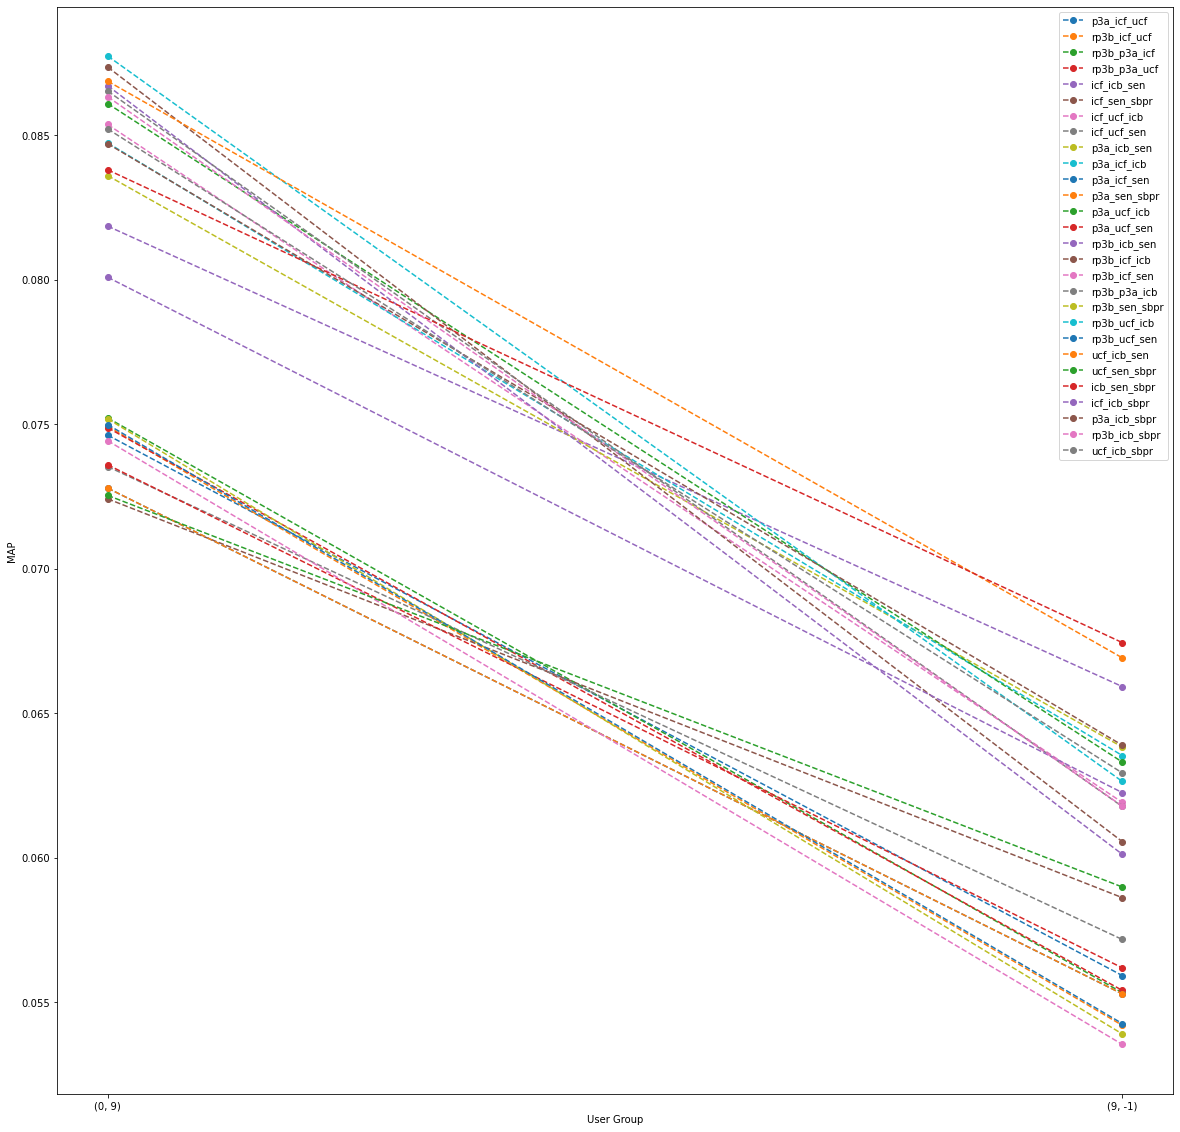

In [89]:
import matplotlib.pyplot as pyplot
%matplotlib inline  
pyplot.figure(figsize=(20,20))
pyplot.plot(MAP_combo1_per_group, '--o', label=labels["combo1"])
pyplot.plot(MAP_combo2_per_group, '--o', label=labels["combo2"])
pyplot.plot(MAP_combo3_per_group, '--o', label=labels["combo3"])
pyplot.plot(MAP_combo4_per_group, '--o', label=labels["combo4"])
pyplot.plot(MAP_combo5_per_group, '--o', label=labels["combo5"])
pyplot.plot(MAP_combo6_per_group, '--o', label=labels["combo6"])
pyplot.plot(MAP_combo7_per_group, '--o', label=labels["combo7"])
pyplot.plot(MAP_combo8_per_group, '--o', label=labels["combo8"])
pyplot.plot(MAP_combo9_per_group, '--o', label=labels["combo9"])
pyplot.plot(MAP_combo10_per_group, '--o', label=labels["combo10"])
pyplot.plot(MAP_combo11_per_group, '--o', label=labels["combo11"])
pyplot.plot(MAP_combo12_per_group, '--o', label=labels["combo12"])
pyplot.plot(MAP_combo13_per_group, '--o', label=labels["combo13"])
pyplot.plot(MAP_combo14_per_group, '--o', label=labels["combo14"])
pyplot.plot(MAP_combo15_per_group, '--o', label=labels["combo15"])
pyplot.plot(MAP_combo16_per_group, '--o', label=labels["combo16"])
pyplot.plot(MAP_combo17_per_group, '--o', label=labels["combo17"])
pyplot.plot(MAP_combo18_per_group, '--o', label=labels["combo18"])
pyplot.plot(MAP_combo19_per_group, '--o', label=labels["combo19"])
pyplot.plot(MAP_combo20_per_group, '--o', label=labels["combo20"])
pyplot.plot(MAP_combo21_per_group, '--o', label=labels["combo21"])
pyplot.plot(MAP_combo22_per_group, '--o', label=labels["combo22"])
pyplot.plot(MAP_combo23_per_group, '--o', label=labels["combo23"])
pyplot.plot(MAP_combo24_per_group, '--o', label=labels["combo24"])
pyplot.plot(MAP_combo25_per_group, '--o', label=labels["combo25"])
pyplot.plot(MAP_combo26_per_group, '--o', label=labels["combo26"])
pyplot.plot(MAP_combo27_per_group, '--o', label=labels["combo27"])
pyplot.plot(MAP_combo28_per_group, '--o', label=labels["combo28"])
pyplot.xticks(ticks=range(0,len(f_ranges)), labels=f_ranges)
pyplot.ylabel('MAP')
pyplot.xlabel('User Group')
pyplot.legend()
pyplot.show()

In [40]:
f_ranges = [
    (0,3),
    (3,-1)
]
MAP_combo1_per_group = []
MAP_combo2_per_group = []
MAP_combo3_per_group = []
MAP_combo4_per_group = []
MAP_combo5_per_group = []
MAP_combo6_per_group = []
MAP_combo7_per_group = []
MAP_combo8_per_group = []
MAP_combo9_per_group = []
MAP_combo10_per_group = []
MAP_combo11_per_group = []
MAP_combo12_per_group = []
MAP_combo13_per_group = []
MAP_combo14_per_group = []
MAP_combo15_per_group = []
MAP_combo16_per_group = []
MAP_combo17_per_group = []
MAP_combo18_per_group = []
MAP_combo19_per_group = []
MAP_combo20_per_group = []
MAP_combo21_per_group = []
MAP_combo22_per_group = []
MAP_combo23_per_group = []
MAP_combo24_per_group = []
MAP_combo25_per_group = []
MAP_combo26_per_group = []
MAP_combo27_per_group = []
MAP_combo28_per_group = []

cutoff = 10

for f_range in f_ranges:
    URM_test_group = parser.filter_URM_test_by_range(URM_train, URM_test, f_range)
    evaluator_test = EvaluatorHoldout(URM_test_group, cutoff_list=[cutoff])
    results, _ = evaluator_test.evaluateRecommender(combo1)
    MAP_combo1_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo2)
    MAP_combo2_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo3)
    MAP_combo3_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo4)
    MAP_combo4_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo5)
    MAP_combo5_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo6)
    MAP_combo6_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo7)
    MAP_combo7_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo8)
    MAP_combo8_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo9)
    MAP_combo9_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo10)
    MAP_combo10_per_group.append(results[cutoff]["MAP"])  
    
    results, _ = evaluator_test.evaluateRecommender(combo11)
    MAP_combo11_per_group.append(results[cutoff]["MAP"]) 
    
    results, _ = evaluator_test.evaluateRecommender(combo12)
    MAP_combo12_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo13)
    MAP_combo13_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo14)
    MAP_combo14_per_group.append(results[cutoff]["MAP"])  
    
    results, _ = evaluator_test.evaluateRecommender(combo15)
    MAP_combo15_per_group.append(results[cutoff]["MAP"]) 
    
    results, _ = evaluator_test.evaluateRecommender(combo16)
    MAP_combo16_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo17)
    MAP_combo17_per_group.append(results[cutoff]["MAP"])  
    
    results, _ = evaluator_test.evaluateRecommender(combo18)
    MAP_combo18_per_group.append(results[cutoff]["MAP"])

    results, _ = evaluator_test.evaluateRecommender(combo19)
    MAP_combo19_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo20)
    MAP_combo20_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo21)
    MAP_combo21_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo22)
    MAP_combo22_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo23)
    MAP_combo23_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo24)
    MAP_combo24_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo25)
    MAP_combo25_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo26)
    MAP_combo26_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo27)
    MAP_combo27_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo28)
    MAP_combo28_per_group.append(results[cutoff]["MAP"])

EvaluatorHoldout: Processed 566 ( 100.00% ) in 1.05 sec. Users per second: 537
EvaluatorHoldout: Processed 566 ( 100.00% ) in 1.15 sec. Users per second: 492
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.96 sec. Users per second: 590
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.98 sec. Users per second: 578
EvaluatorHoldout: Processed 566 ( 100.00% ) in 1.27 sec. Users per second: 446
EvaluatorHoldout: Processed 566 ( 100.00% ) in 1.41 sec. Users per second: 402
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.99 sec. Users per second: 571
EvaluatorHoldout: Processed 566 ( 100.00% ) in 1.02 sec. Users per second: 554
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.97 sec. Users per second: 584
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.96 sec. Users per second: 590
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.96 sec. Users per second: 590
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.95 sec. Users per second: 594
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.96 

In [41]:
MAP_combo_list = [MAP_combo1_per_group,
                  MAP_combo2_per_group,
                  MAP_combo3_per_group,
                  MAP_combo4_per_group,
                  MAP_combo5_per_group,
                  MAP_combo6_per_group,
                  MAP_combo7_per_group,
                  MAP_combo8_per_group,
                  MAP_combo9_per_group,
                  MAP_combo10_per_group,
                  MAP_combo11_per_group,
                  MAP_combo12_per_group,
                  MAP_combo13_per_group,
                  MAP_combo14_per_group,
                  MAP_combo15_per_group,
                  MAP_combo16_per_group,
                  MAP_combo17_per_group,
                  MAP_combo18_per_group,
                  MAP_combo19_per_group,
                  MAP_combo20_per_group,
                  MAP_combo21_per_group,
                  MAP_combo22_per_group,
                  MAP_combo23_per_group,
                  MAP_combo24_per_group,
                  MAP_combo25_per_group,
                  MAP_combo26_per_group,
                  MAP_combo27_per_group,
                  MAP_combo28_per_group]

In [42]:
for i in range(0, len (f_ranges)):
    print(f"RANGE {f_ranges[i]}")
    maxp = 0
    maxc = ''
    combo_difference = ''
    max_difference = 0
    for n, MAP_combo in enumerate(MAP_combo_list):
        combo_name = 'combo' + str(n+1)
        print(f"> MAP {labels[combo_name]}:\t {MAP_combo[i]}")
        if MAP_combo[i] > maxp:
            max_difference = MAP_combo[i] - maxp
            combo_difference = maxc
            maxp = MAP_combo[i]
            maxc = labels[combo_name]
    print(f"Max MAP is {maxp} from {maxc} with difference from previous max of {max_difference} from {combo_difference}\n")

RANGE (0, 3)
> MAP p3a_icf_ucf:	 0.06855719614111841
> MAP rp3b_icf_ucf:	 0.06926426047450783
> MAP rp3b_p3a_icf:	 0.06871038757081162
> MAP rp3b_p3a_ucf:	 0.06712834427057043
> MAP icf_icb_sen:	 0.07349753211060633
> MAP icf_sen_sbpr:	 0.06389484828089069
> MAP icf_ucf_icb:	 0.07813779516518034
> MAP icf_ucf_sen:	 0.06809026025015427
> MAP p3a_icb_sen:	 0.07965533681081387
> MAP p3a_icf_icb:	 0.08091872791519436
> MAP p3a_icf_sen:	 0.06497349823321558
> MAP p3a_sen_sbpr:	 0.06497349823321558
> MAP p3a_ucf_icb:	 0.08080655112457232
> MAP p3a_ucf_sen:	 0.0663830697178754
> MAP rp3b_icb_sen:	 0.081013026529811
> MAP rp3b_icf_icb:	 0.08363866453530765
> MAP rp3b_icf_sen:	 0.06860872735431042
> MAP rp3b_p3a_icb:	 0.08225152840877224
> MAP rp3b_sen_sbpr:	 0.0674245611083067
> MAP rp3b_ucf_icb:	 0.08202542206517474
> MAP rp3b_ucf_sen:	 0.06756478209658423
> MAP ucf_icb_sen:	 0.07689789107633631
> MAP ucf_sen_sbpr:	 0.0649082954736665
> MAP icb_sen_sbpr:	 0.07274174098379046
> MAP icf_icb_sbp

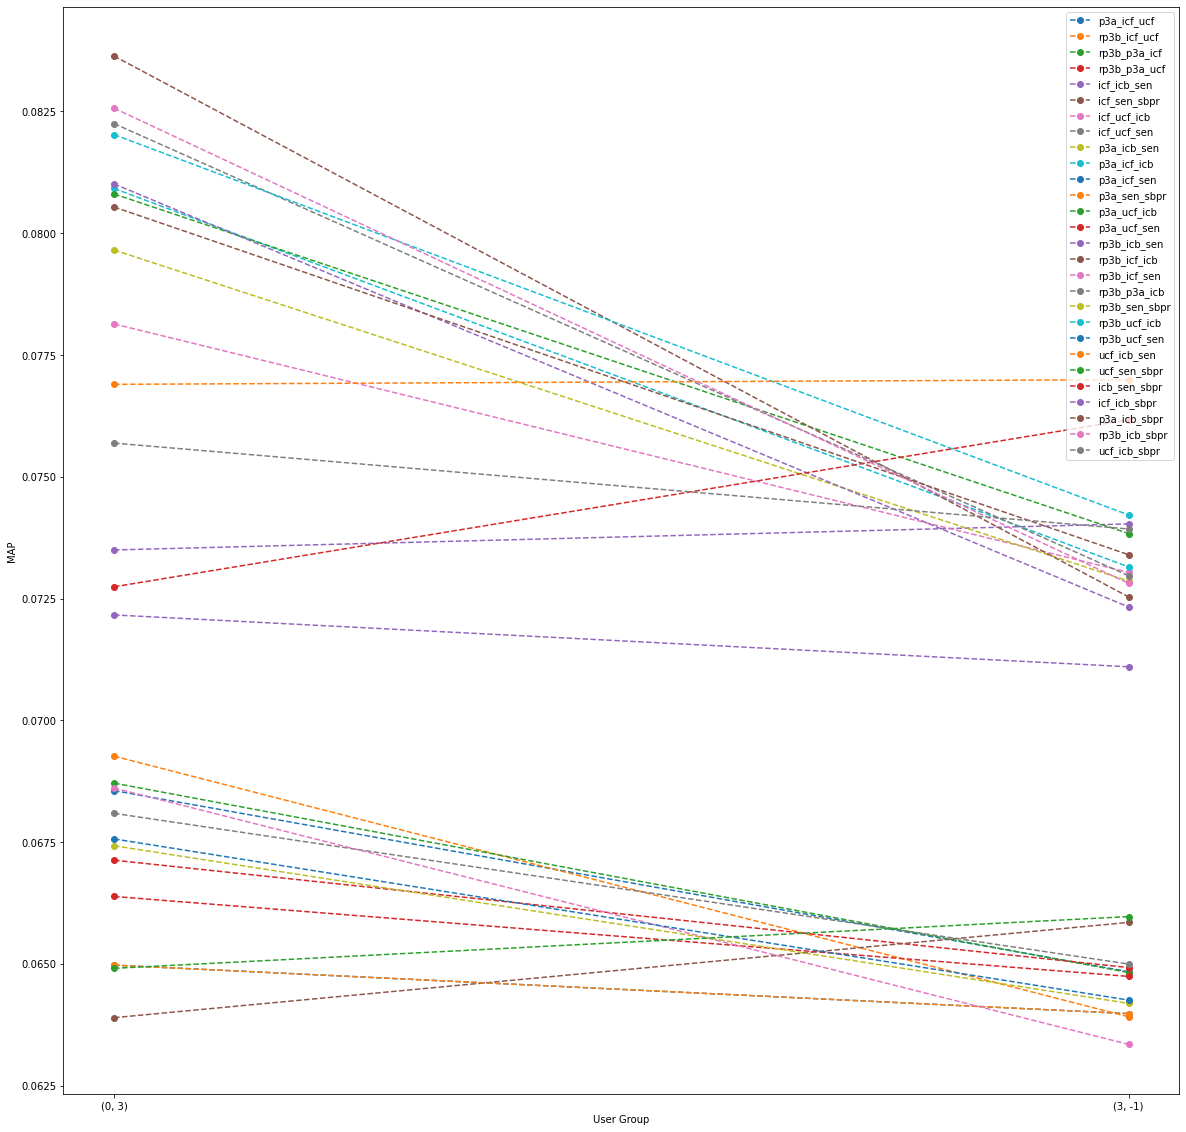

In [43]:
import matplotlib.pyplot as pyplot
%matplotlib inline  
pyplot.figure(figsize=(20,20))
pyplot.plot(MAP_combo1_per_group, '--o', label=labels["combo1"])
pyplot.plot(MAP_combo2_per_group, '--o', label=labels["combo2"])
pyplot.plot(MAP_combo3_per_group, '--o', label=labels["combo3"])
pyplot.plot(MAP_combo4_per_group, '--o', label=labels["combo4"])
pyplot.plot(MAP_combo5_per_group, '--o', label=labels["combo5"])
pyplot.plot(MAP_combo6_per_group, '--o', label=labels["combo6"])
pyplot.plot(MAP_combo7_per_group, '--o', label=labels["combo7"])
pyplot.plot(MAP_combo8_per_group, '--o', label=labels["combo8"])
pyplot.plot(MAP_combo9_per_group, '--o', label=labels["combo9"])
pyplot.plot(MAP_combo10_per_group, '--o', label=labels["combo10"])
pyplot.plot(MAP_combo11_per_group, '--o', label=labels["combo11"])
pyplot.plot(MAP_combo12_per_group, '--o', label=labels["combo12"])
pyplot.plot(MAP_combo13_per_group, '--o', label=labels["combo13"])
pyplot.plot(MAP_combo14_per_group, '--o', label=labels["combo14"])
pyplot.plot(MAP_combo15_per_group, '--o', label=labels["combo15"])
pyplot.plot(MAP_combo16_per_group, '--o', label=labels["combo16"])
pyplot.plot(MAP_combo17_per_group, '--o', label=labels["combo17"])
pyplot.plot(MAP_combo18_per_group, '--o', label=labels["combo18"])
pyplot.plot(MAP_combo19_per_group, '--o', label=labels["combo19"])
pyplot.plot(MAP_combo20_per_group, '--o', label=labels["combo20"])
pyplot.plot(MAP_combo21_per_group, '--o', label=labels["combo21"])
pyplot.plot(MAP_combo22_per_group, '--o', label=labels["combo22"])
pyplot.plot(MAP_combo23_per_group, '--o', label=labels["combo23"])
pyplot.plot(MAP_combo24_per_group, '--o', label=labels["combo24"])
pyplot.plot(MAP_combo25_per_group, '--o', label=labels["combo25"])
pyplot.plot(MAP_combo26_per_group, '--o', label=labels["combo26"])
pyplot.plot(MAP_combo27_per_group, '--o', label=labels["combo27"])
pyplot.plot(MAP_combo28_per_group, '--o', label=labels["combo28"])
pyplot.xticks(ticks=range(0,len(f_ranges)), labels=f_ranges)
pyplot.ylabel('MAP')
pyplot.xlabel('User Group')
pyplot.legend()
pyplot.show()

In [44]:
f_ranges = [
    (0,2),
    (2,-1)
]
MAP_combo1_per_group = []
MAP_combo2_per_group = []
MAP_combo3_per_group = []
MAP_combo4_per_group = []
MAP_combo5_per_group = []
MAP_combo6_per_group = []
MAP_combo7_per_group = []
MAP_combo8_per_group = []
MAP_combo9_per_group = []
MAP_combo10_per_group = []
MAP_combo11_per_group = []
MAP_combo12_per_group = []
MAP_combo13_per_group = []
MAP_combo14_per_group = []
MAP_combo15_per_group = []
MAP_combo16_per_group = []
MAP_combo17_per_group = []
MAP_combo18_per_group = []
MAP_combo19_per_group = []
MAP_combo20_per_group = []
MAP_combo21_per_group = []
MAP_combo22_per_group = []
MAP_combo23_per_group = []
MAP_combo24_per_group = []
MAP_combo25_per_group = []
MAP_combo26_per_group = []
MAP_combo27_per_group = []
MAP_combo28_per_group = []

cutoff = 10

for f_range in f_ranges:
    URM_test_group = parser.filter_URM_test_by_range(URM_train, URM_test, f_range)
    evaluator_test = EvaluatorHoldout(URM_test_group, cutoff_list=[cutoff])
    results, _ = evaluator_test.evaluateRecommender(combo1)
    MAP_combo1_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo2)
    MAP_combo2_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo3)
    MAP_combo3_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo4)
    MAP_combo4_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo5)
    MAP_combo5_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo6)
    MAP_combo6_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo7)
    MAP_combo7_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo8)
    MAP_combo8_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo9)
    MAP_combo9_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo10)
    MAP_combo10_per_group.append(results[cutoff]["MAP"])  
    
    results, _ = evaluator_test.evaluateRecommender(combo11)
    MAP_combo11_per_group.append(results[cutoff]["MAP"]) 
    
    results, _ = evaluator_test.evaluateRecommender(combo12)
    MAP_combo12_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo13)
    MAP_combo13_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo14)
    MAP_combo14_per_group.append(results[cutoff]["MAP"])  
    
    results, _ = evaluator_test.evaluateRecommender(combo15)
    MAP_combo15_per_group.append(results[cutoff]["MAP"]) 
    
    results, _ = evaluator_test.evaluateRecommender(combo16)
    MAP_combo16_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo17)
    MAP_combo17_per_group.append(results[cutoff]["MAP"])  
    
    results, _ = evaluator_test.evaluateRecommender(combo18)
    MAP_combo18_per_group.append(results[cutoff]["MAP"])

    results, _ = evaluator_test.evaluateRecommender(combo19)
    MAP_combo19_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo20)
    MAP_combo20_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo21)
    MAP_combo21_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo22)
    MAP_combo22_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo23)
    MAP_combo23_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo24)
    MAP_combo24_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo25)
    MAP_combo25_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo26)
    MAP_combo26_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo27)
    MAP_combo27_per_group.append(results[cutoff]["MAP"])
    results, _ = evaluator_test.evaluateRecommender(combo28)
    MAP_combo28_per_group.append(results[cutoff]["MAP"])

EvaluatorHoldout: Processed 232 ( 100.00% ) in 0.37 sec. Users per second: 627
EvaluatorHoldout: Processed 232 ( 100.00% ) in 0.37 sec. Users per second: 624
EvaluatorHoldout: Processed 232 ( 100.00% ) in 0.38 sec. Users per second: 604
EvaluatorHoldout: Processed 232 ( 100.00% ) in 0.40 sec. Users per second: 580
EvaluatorHoldout: Processed 232 ( 100.00% ) in 0.36 sec. Users per second: 637
EvaluatorHoldout: Processed 232 ( 100.00% ) in 0.39 sec. Users per second: 595
EvaluatorHoldout: Processed 232 ( 100.00% ) in 0.39 sec. Users per second: 589
EvaluatorHoldout: Processed 232 ( 100.00% ) in 0.41 sec. Users per second: 560
EvaluatorHoldout: Processed 232 ( 100.00% ) in 0.41 sec. Users per second: 560
EvaluatorHoldout: Processed 232 ( 100.00% ) in 0.41 sec. Users per second: 563
EvaluatorHoldout: Processed 232 ( 100.00% ) in 0.40 sec. Users per second: 577
EvaluatorHoldout: Processed 232 ( 100.00% ) in 0.40 sec. Users per second: 573
EvaluatorHoldout: Processed 232 ( 100.00% ) in 0.40 

In [45]:
MAP_combo_list = [MAP_combo1_per_group,
                  MAP_combo2_per_group,
                  MAP_combo3_per_group,
                  MAP_combo4_per_group,
                  MAP_combo5_per_group,
                  MAP_combo6_per_group,
                  MAP_combo7_per_group,
                  MAP_combo8_per_group,
                  MAP_combo9_per_group,
                  MAP_combo10_per_group,
                  MAP_combo11_per_group,
                  MAP_combo12_per_group,
                  MAP_combo13_per_group,
                  MAP_combo14_per_group,
                  MAP_combo15_per_group,
                  MAP_combo16_per_group,
                  MAP_combo17_per_group,
                  MAP_combo18_per_group,
                  MAP_combo19_per_group,
                  MAP_combo20_per_group,
                  MAP_combo21_per_group,
                  MAP_combo22_per_group,
                  MAP_combo23_per_group,
                  MAP_combo24_per_group,
                  MAP_combo25_per_group,
                  MAP_combo26_per_group,
                  MAP_combo27_per_group,
                  MAP_combo28_per_group]

In [46]:
for i in range(0, len (f_ranges)):
    print(f"RANGE {f_ranges[i]}")
    maxp = 0
    maxc = ''
    combo_difference = ''
    max_difference = 0
    for n, MAP_combo in enumerate(MAP_combo_list):
        combo_name = 'combo' + str(n+1)
        print(f"> MAP {labels[combo_name]}:\t {MAP_combo[i]}")
        if MAP_combo[i] > maxp:
            max_difference = MAP_combo[i] - maxp
            combo_difference = maxc
            maxp = MAP_combo[i]
            maxc = labels[combo_name]
    print(f"Max MAP is {maxp} from {maxc} with difference from previous max of {max_difference} from {combo_difference}\n")

RANGE (0, 2)
> MAP p3a_icf_ucf:	 0.06341509304871372
> MAP rp3b_icf_ucf:	 0.06125478927203063
> MAP rp3b_p3a_icf:	 0.061147030651340986
> MAP rp3b_p3a_ucf:	 0.05815886699507388
> MAP icf_icb_sen:	 0.06451320470717023
> MAP icf_sen_sbpr:	 0.05706417624521072
> MAP icf_ucf_icb:	 0.07139607279693487
> MAP icf_ucf_sen:	 0.058740421455938684
> MAP p3a_icb_sen:	 0.06436097427476738
> MAP p3a_icf_icb:	 0.06795977011494253
> MAP p3a_icf_sen:	 0.05524938423645319
> MAP p3a_sen_sbpr:	 0.05524938423645319
> MAP p3a_ucf_icb:	 0.07707820197044336
> MAP p3a_ucf_sen:	 0.05791427203065133
> MAP rp3b_icb_sen:	 0.06819239189928844
> MAP rp3b_icf_icb:	 0.07248563218390805
> MAP rp3b_icf_sen:	 0.05866858237547891
> MAP rp3b_p3a_icb:	 0.06818726053639847
> MAP rp3b_sen_sbpr:	 0.058500957854406115
> MAP rp3b_ucf_icb:	 0.0726720717022441
> MAP rp3b_ucf_sen:	 0.05812978927203064
> MAP ucf_icb_sen:	 0.06739360974274766
> MAP ucf_sen_sbpr:	 0.05817768199233715
> MAP icb_sen_sbpr:	 0.0649681855500821
> MAP icf_i

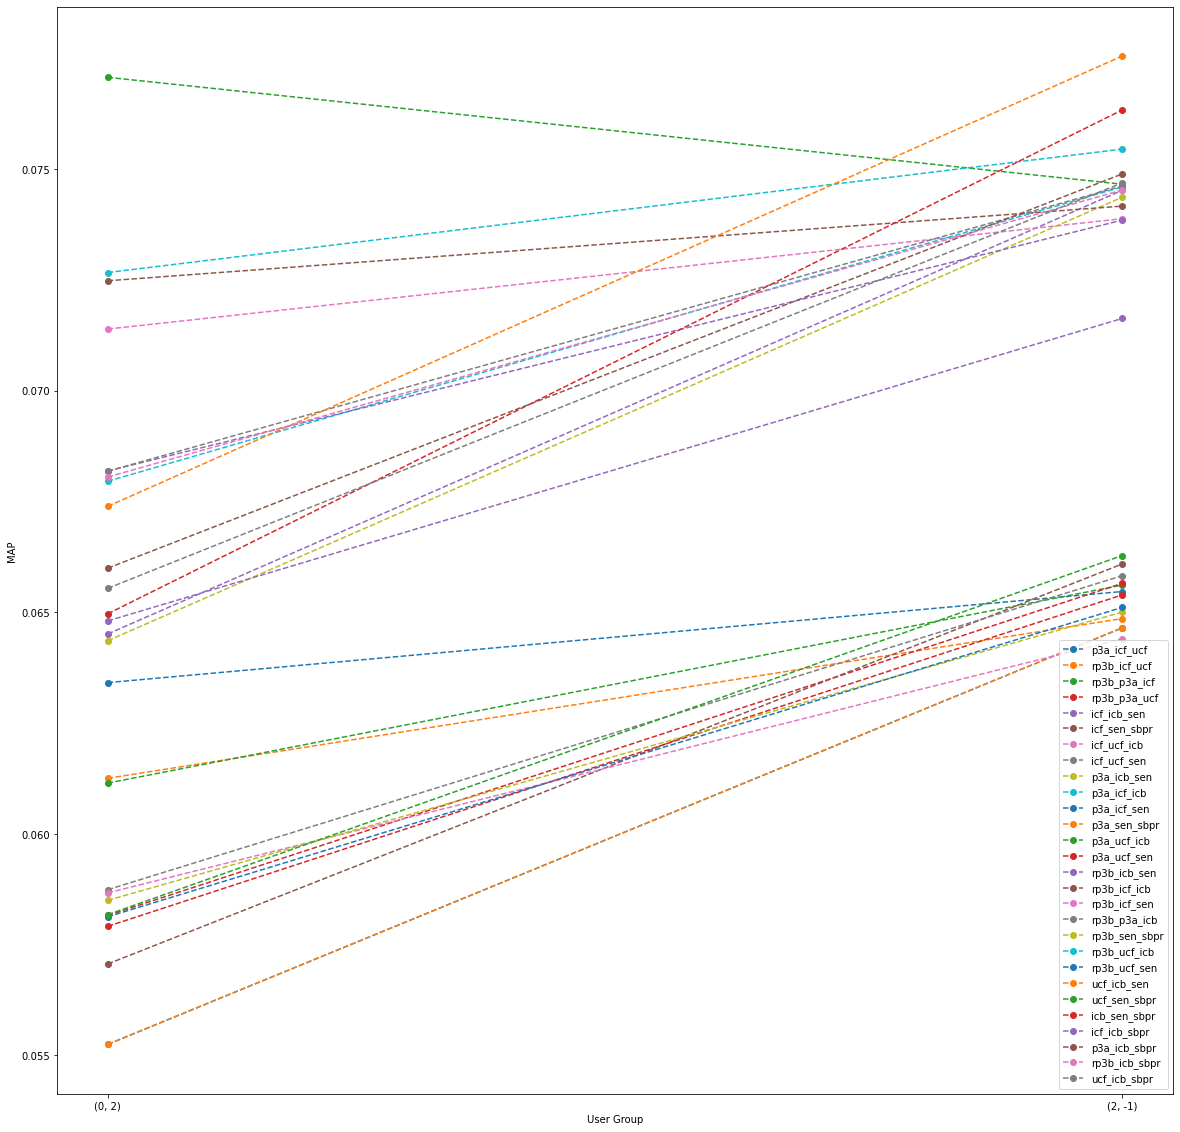

In [47]:
import matplotlib.pyplot as pyplot
%matplotlib inline  
pyplot.figure(figsize=(20,20))
pyplot.plot(MAP_combo1_per_group, '--o', label=labels["combo1"])
pyplot.plot(MAP_combo2_per_group, '--o', label=labels["combo2"])
pyplot.plot(MAP_combo3_per_group, '--o', label=labels["combo3"])
pyplot.plot(MAP_combo4_per_group, '--o', label=labels["combo4"])
pyplot.plot(MAP_combo5_per_group, '--o', label=labels["combo5"])
pyplot.plot(MAP_combo6_per_group, '--o', label=labels["combo6"])
pyplot.plot(MAP_combo7_per_group, '--o', label=labels["combo7"])
pyplot.plot(MAP_combo8_per_group, '--o', label=labels["combo8"])
pyplot.plot(MAP_combo9_per_group, '--o', label=labels["combo9"])
pyplot.plot(MAP_combo10_per_group, '--o', label=labels["combo10"])
pyplot.plot(MAP_combo11_per_group, '--o', label=labels["combo11"])
pyplot.plot(MAP_combo12_per_group, '--o', label=labels["combo12"])
pyplot.plot(MAP_combo13_per_group, '--o', label=labels["combo13"])
pyplot.plot(MAP_combo14_per_group, '--o', label=labels["combo14"])
pyplot.plot(MAP_combo15_per_group, '--o', label=labels["combo15"])
pyplot.plot(MAP_combo16_per_group, '--o', label=labels["combo16"])
pyplot.plot(MAP_combo17_per_group, '--o', label=labels["combo17"])
pyplot.plot(MAP_combo18_per_group, '--o', label=labels["combo18"])
pyplot.plot(MAP_combo19_per_group, '--o', label=labels["combo19"])
pyplot.plot(MAP_combo20_per_group, '--o', label=labels["combo20"])
pyplot.plot(MAP_combo21_per_group, '--o', label=labels["combo21"])
pyplot.plot(MAP_combo22_per_group, '--o', label=labels["combo22"])
pyplot.plot(MAP_combo23_per_group, '--o', label=labels["combo23"])
pyplot.plot(MAP_combo24_per_group, '--o', label=labels["combo24"])
pyplot.plot(MAP_combo25_per_group, '--o', label=labels["combo25"])
pyplot.plot(MAP_combo26_per_group, '--o', label=labels["combo26"])
pyplot.plot(MAP_combo27_per_group, '--o', label=labels["combo27"])
pyplot.plot(MAP_combo28_per_group, '--o', label=labels["combo28"])
pyplot.xticks(ticks=range(0,len(f_ranges)), labels=f_ranges)
pyplot.ylabel('MAP')
pyplot.xlabel('User Group')
pyplot.legend()
pyplot.show()